In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('SaYoPillow.csv')
col=list(data.columns.values)
col

['sr', 'rr', 't', 'lm', 'bo', 'rem', 'srh', 'hr', 'sl']

In [3]:
min(data["sl"])

0

In [4]:
max(data["sl"])

4

In [72]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

  
# Create features and target
X = data
y =  target
  
# Convert to categorical data by converting data to integers
X = X.astype(int)
  
# Two features with highest chi-squared statistics are selected
chi2_features = SelectKBest(chi2, k = 3)
X_kbest_features = chi2_features.fit_transform(X, y)

data['pca-one'] = X_kbest_features[:,0]
data['pca-two'] = X_kbest_features[:,1] 
data['pca-three'] = X_kbest_features[:,2] 

C:\Users\SOHAIL~1\AppData\Local\Temp/ipykernel_9024/2804007799.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  threedee = plt.figure(figsize=(6, 6), dpi=300).gca(projection='3d')


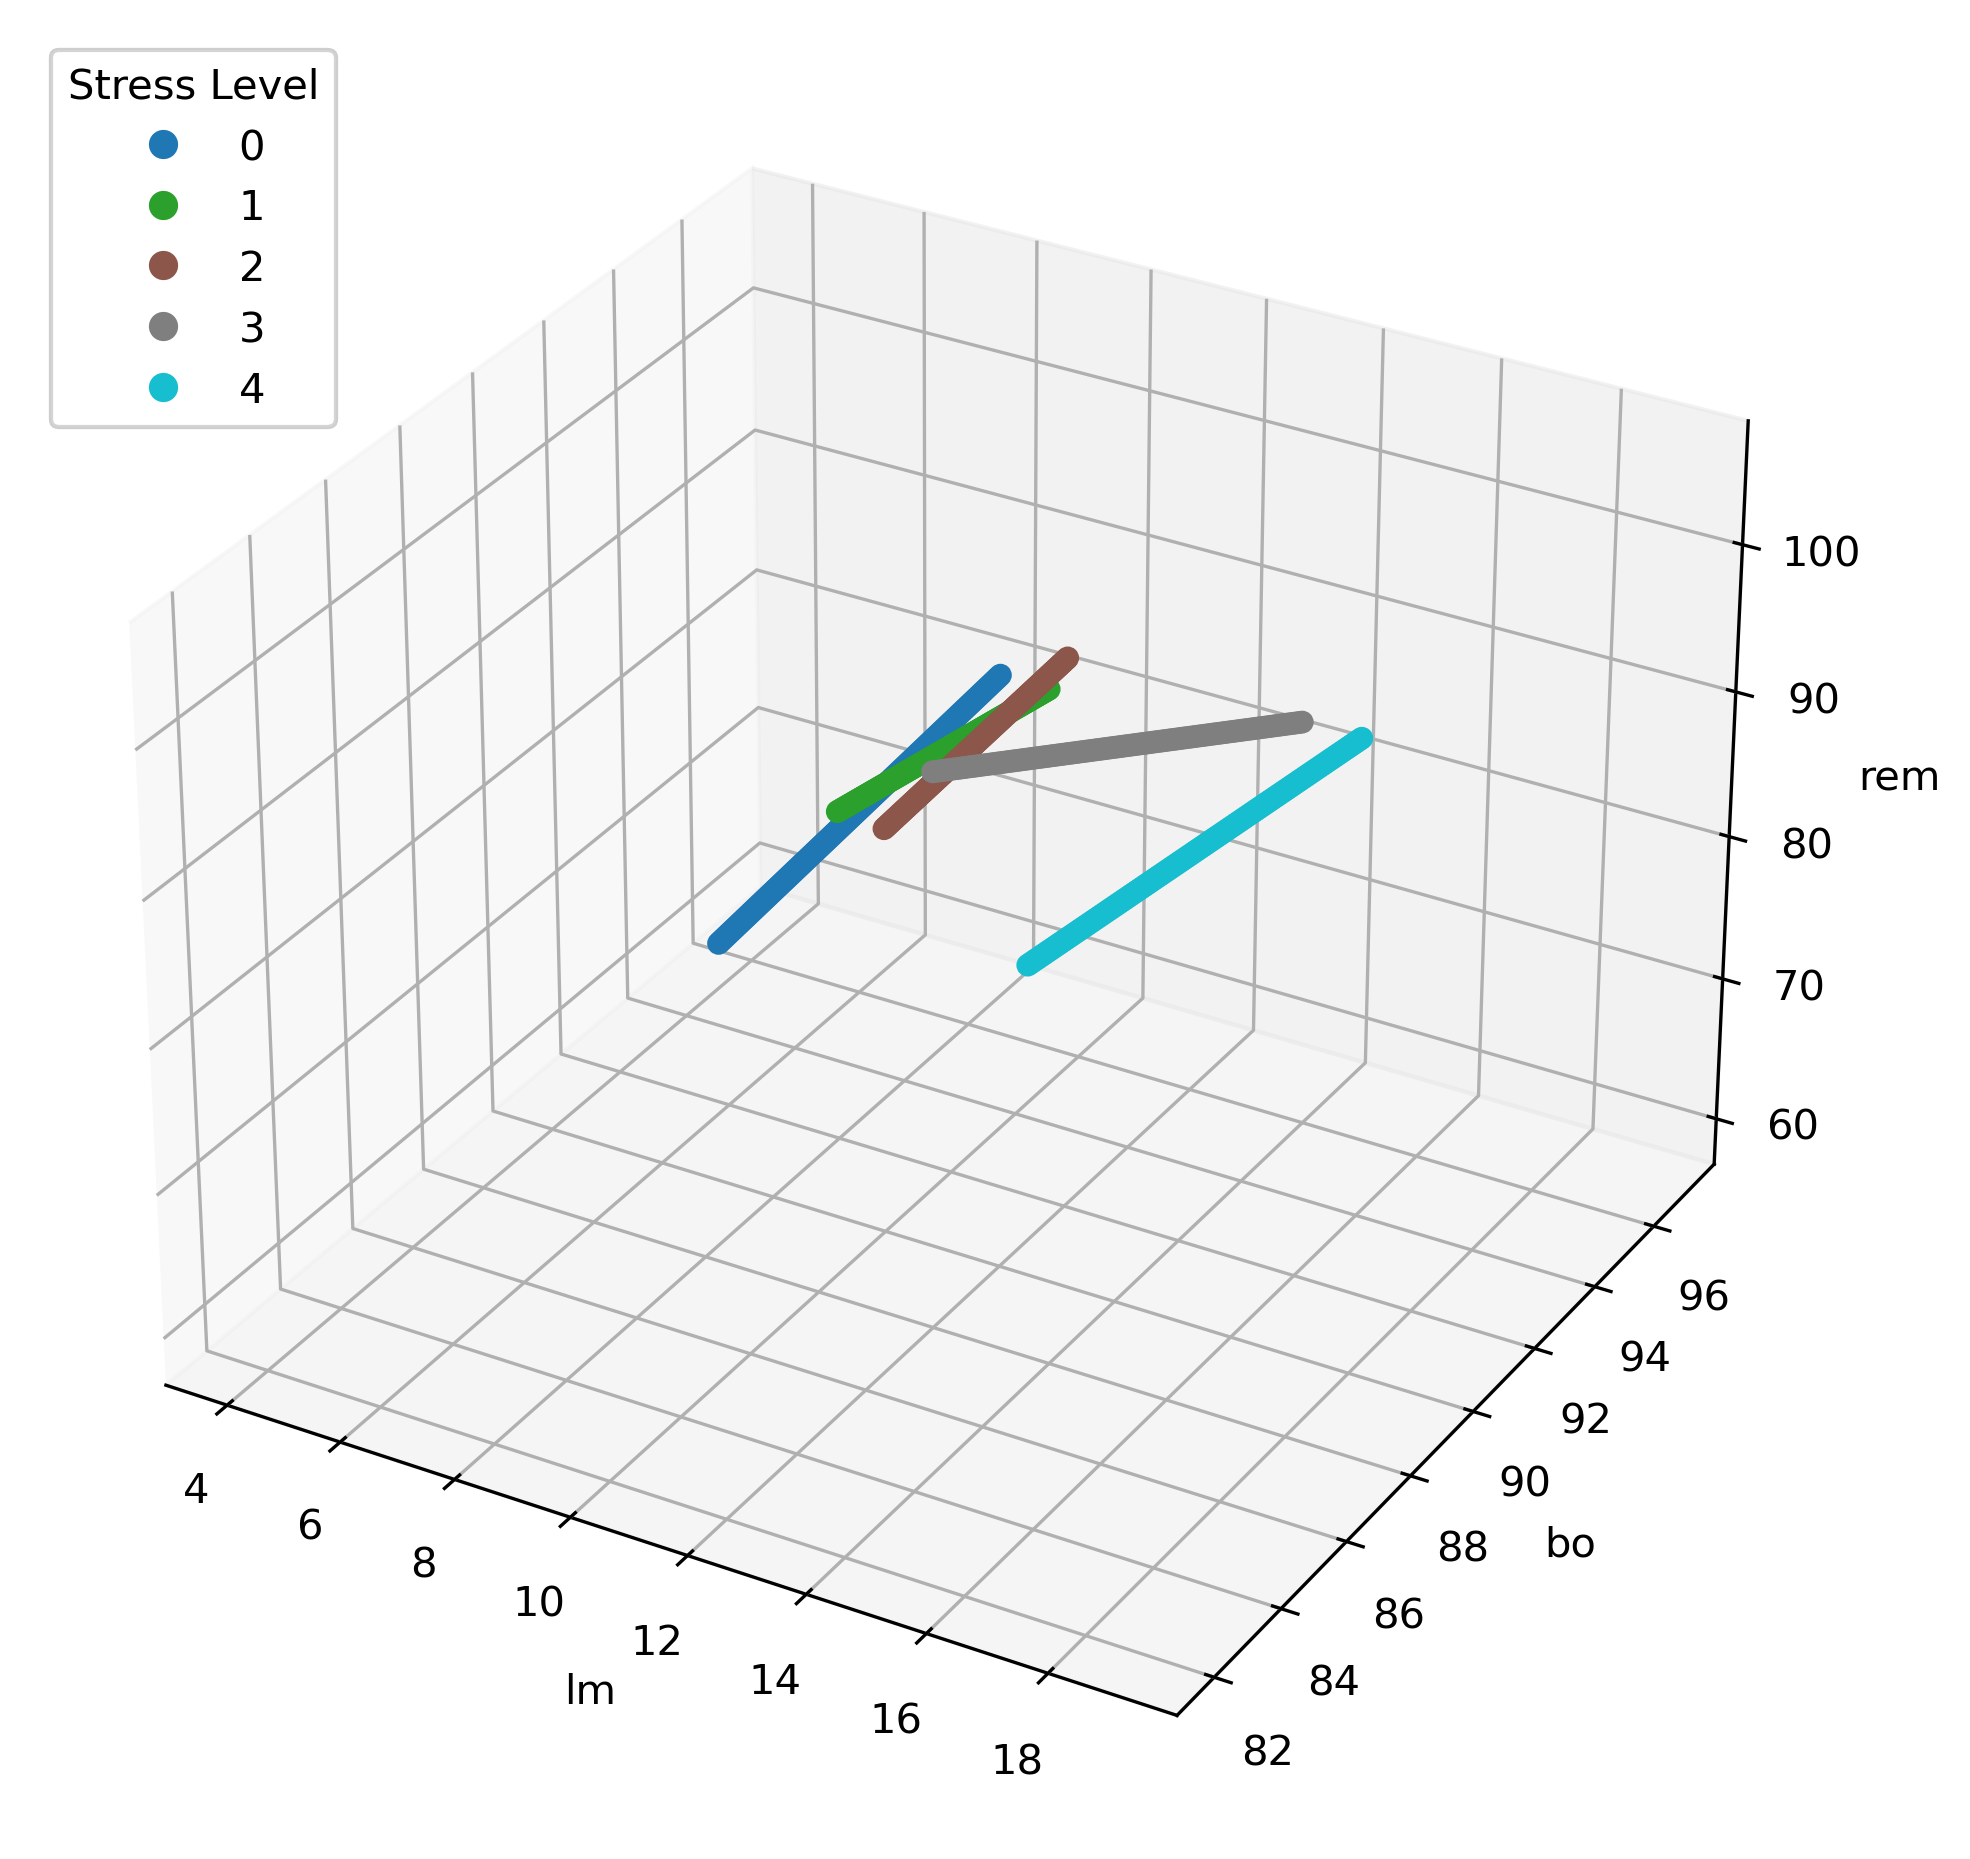

In [74]:

threedee = plt.figure(figsize=(6, 6), dpi=300).gca(projection='3d')
import numpy as np
# Creating color map
my_cmap = plt.get_cmap('tab10')
scatter= threedee.scatter(data['lm'],data['bo'],data['rem'],c=data['sl'], alpha=1.0, marker=r'o', cmap = my_cmap)
threedee.set_xlabel('lm')
threedee.set_ylabel('bo')
threedee.set_zlabel('rem')
legend1 = threedee.legend(*scatter.legend_elements(), loc="upper left", title="Stress Level")
threedee.add_artist(legend1)
plt.tight_layout(pad=0)
plt.savefig('stressfeature2.pdf')
plt.show()

C:\Users\SOHAIL~1\AppData\Local\Temp/ipykernel_9024/1319021707.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  h.hist(ax = ax)


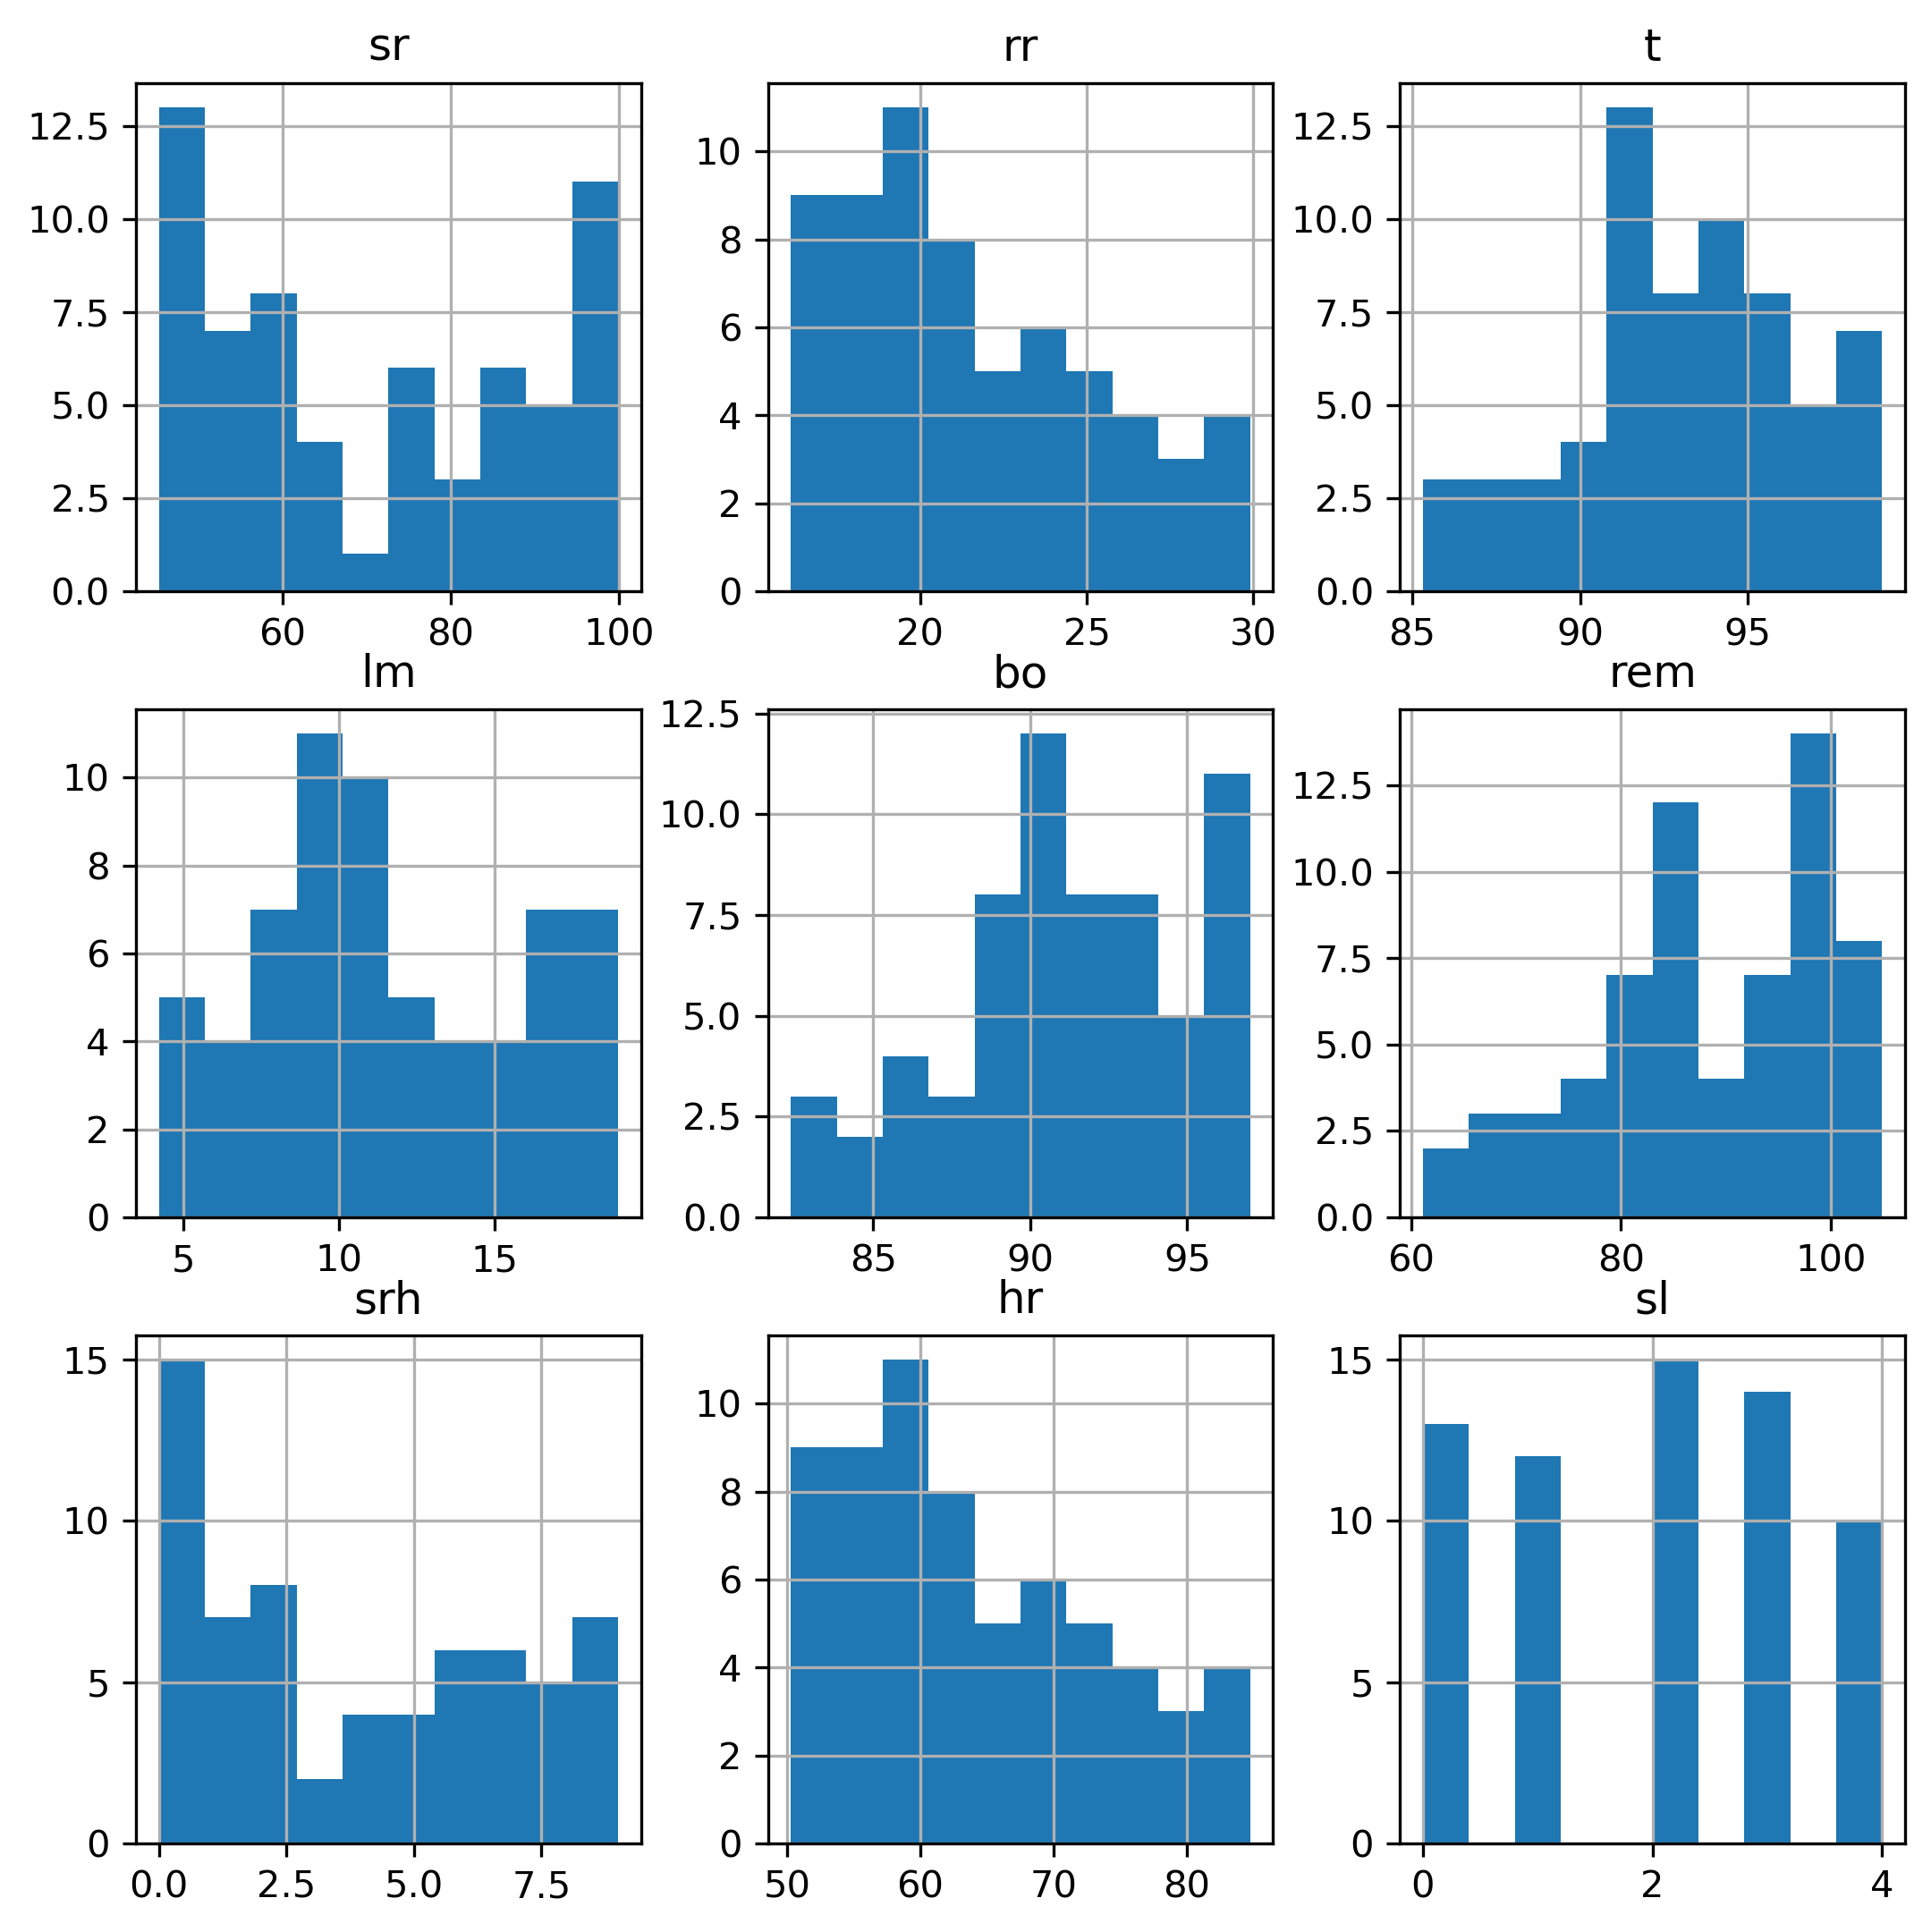

In [22]:
h = data.iloc[:64, :20]
fig = plt.figure(figsize = (7,7),dpi=300)
ax = fig.gca()
h.hist(ax = ax)


plt.tight_layout(pad=0)
plt.savefig('stressValuerange.pdf')
plt.show()

In [5]:
from collections import Counter
Counter(data["sl"])

Counter({3: 126, 1: 126, 0: 126, 2: 126, 4: 126})

In [6]:
target=data["sl"]
data.drop(["sl"], axis=1, inplace=True)

In [78]:
data

sr      rr       t      lm      bo     rem   sr.1     hr
0    93.800  25.680  91.840  16.600  89.840   99.60  1.840  74.20
1    91.640  25.104  91.552  15.880  89.552   98.88  1.552  72.76
2    60.000  20.000  96.000  10.000  95.000   85.00  7.000  60.00
3    85.760  23.536  90.768  13.920  88.768   96.92  0.768  68.84
4    48.120  17.248  97.872   6.496  96.248   72.48  8.248  53.12
..      ...     ...     ...     ...     ...     ...    ...    ...
625  69.600  20.960  92.960  10.960  90.960   89.80  3.440  62.40
626  48.440  17.376  98.064   6.752  96.376   73.76  8.376  53.44
627  97.504  27.504  86.880  17.752  84.256  101.88  0.000  78.76
628  58.640  19.728  95.728   9.728  94.592   84.32  6.728  59.32
629  73.920  21.392  93.392  11.392  91.392   91.96  4.088  63.48

[630 rows x 8 columns]

In [52]:
print("train")
print(Counter(y_train))
print("test")
print(Counter(y_test))

train
Counter({1: 102, 3: 102, 2: 101, 4: 100, 0: 99})
test
Counter({0: 27, 4: 26, 2: 25, 1: 24, 3: 24})


C:\Users\Sohail_Comp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


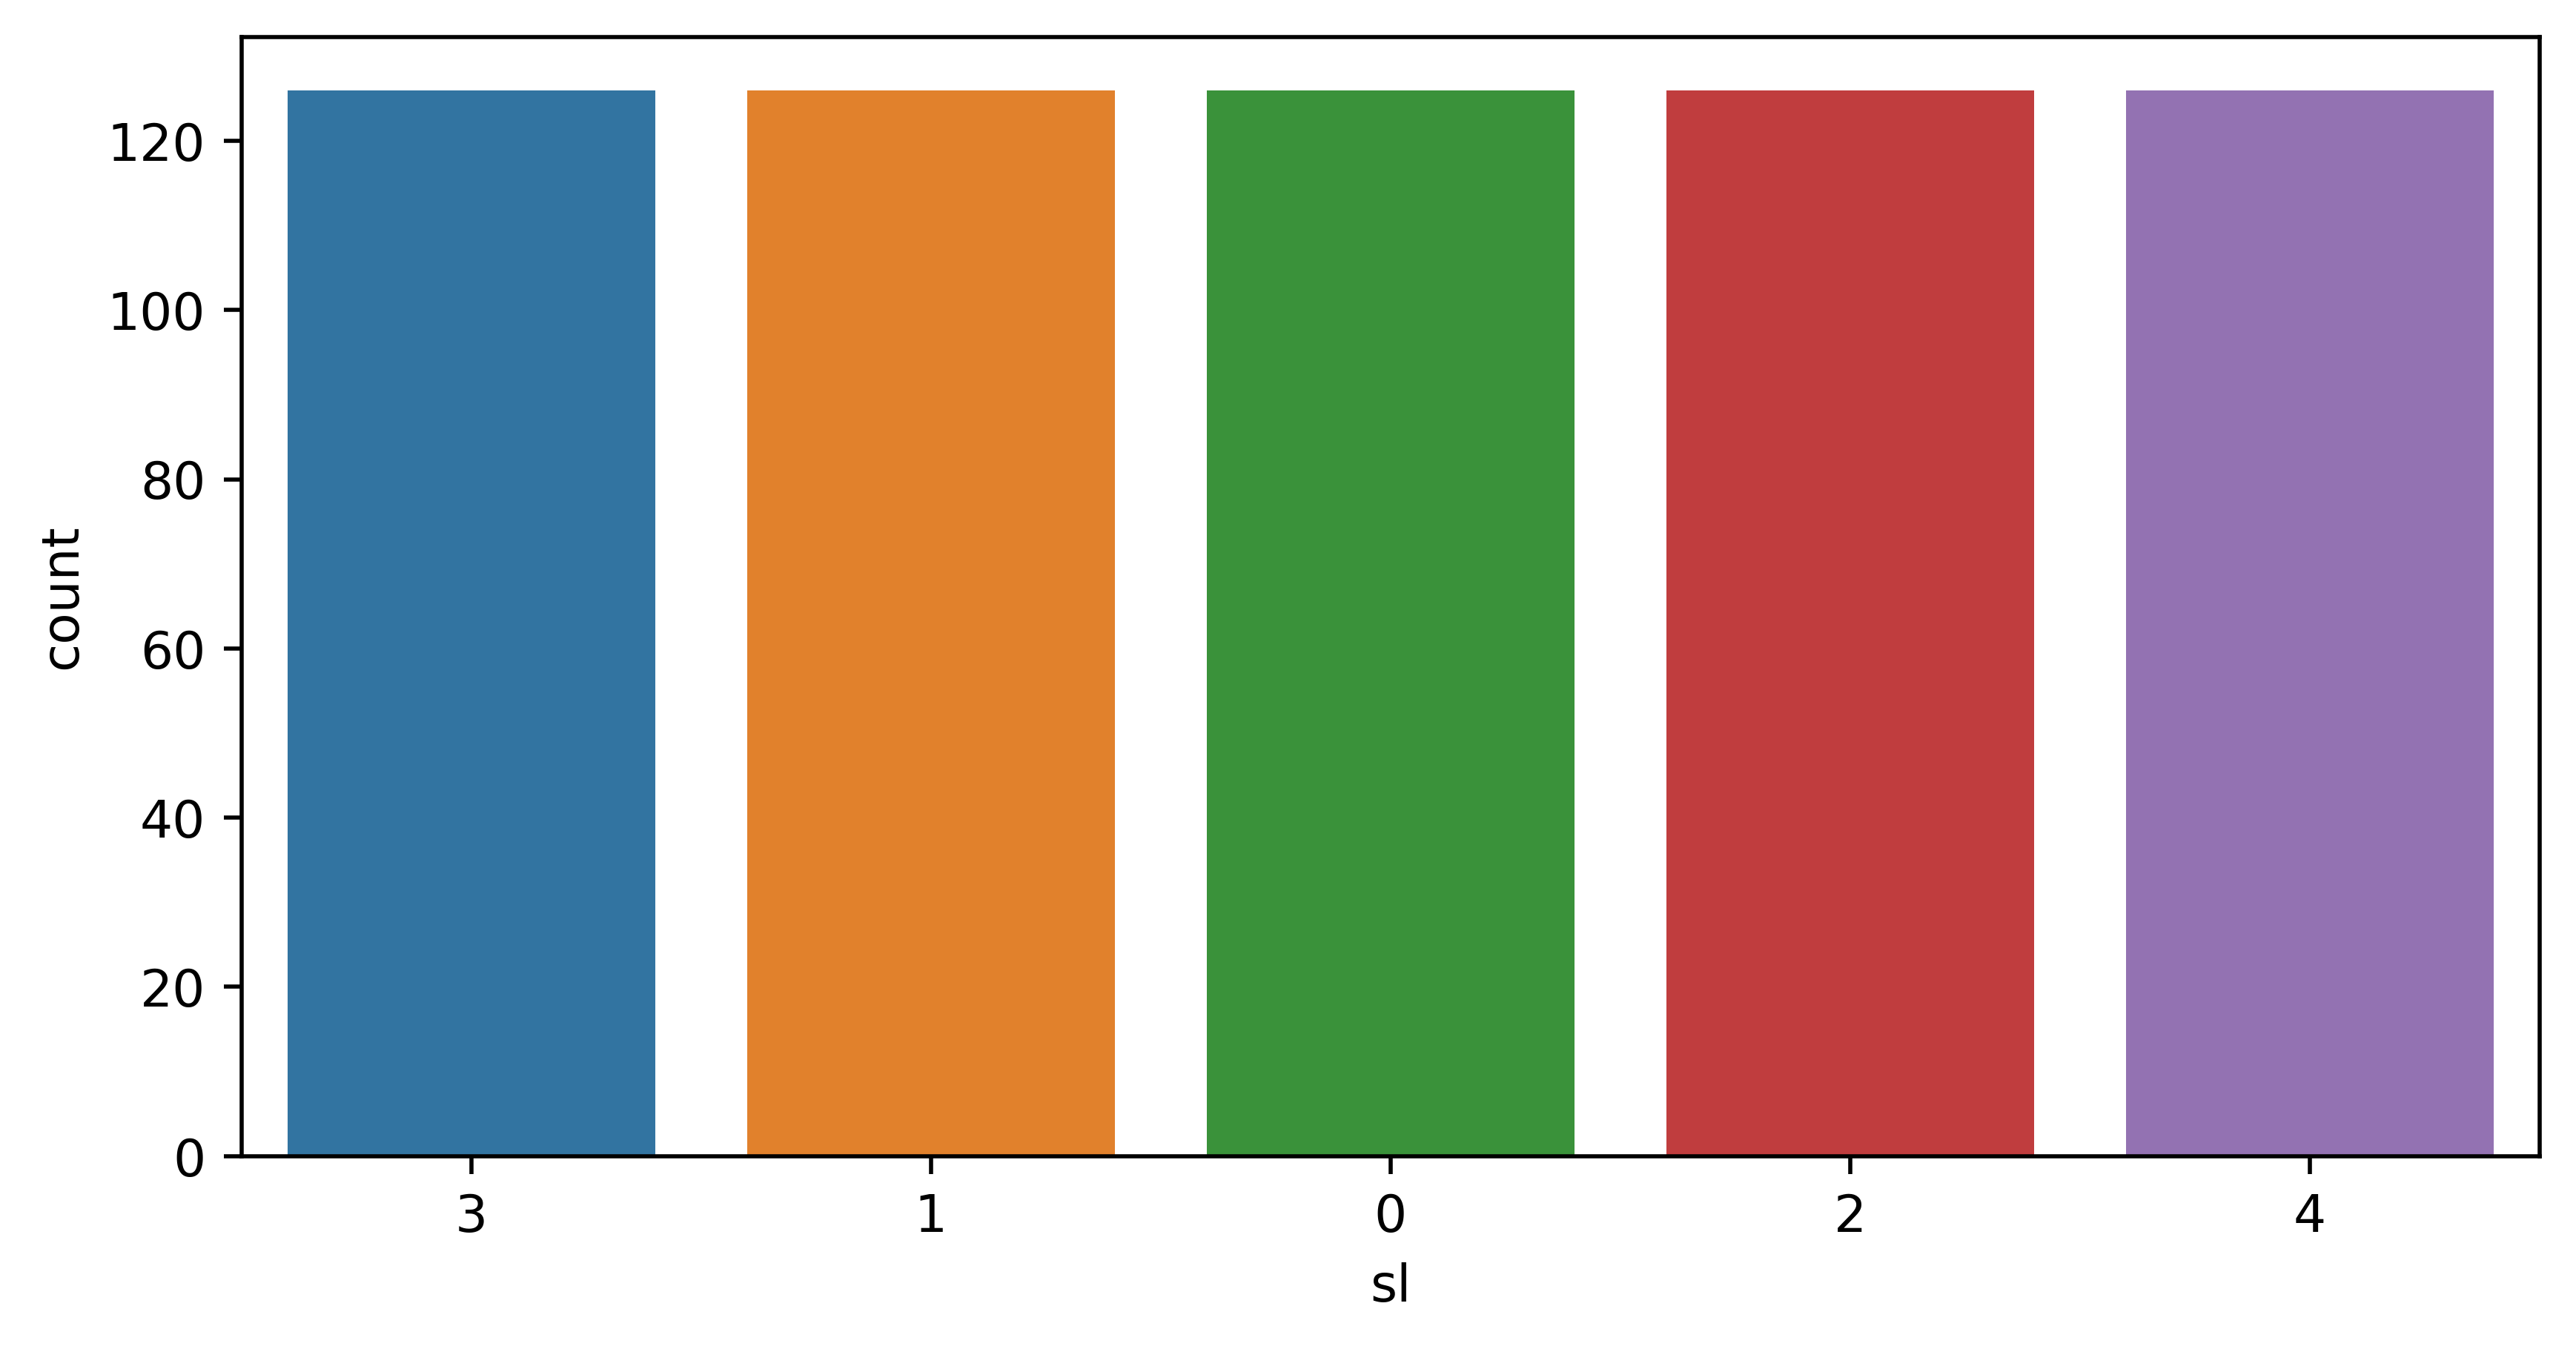

In [8]:
from matplotlib import pyplot
y = target       
fig, ax = pyplot.subplots(figsize=(8,4),dpi=500)
ax = sns.countplot(y,label="Count",ax=ax,order=target.value_counts().iloc[:15].index )   


ETC


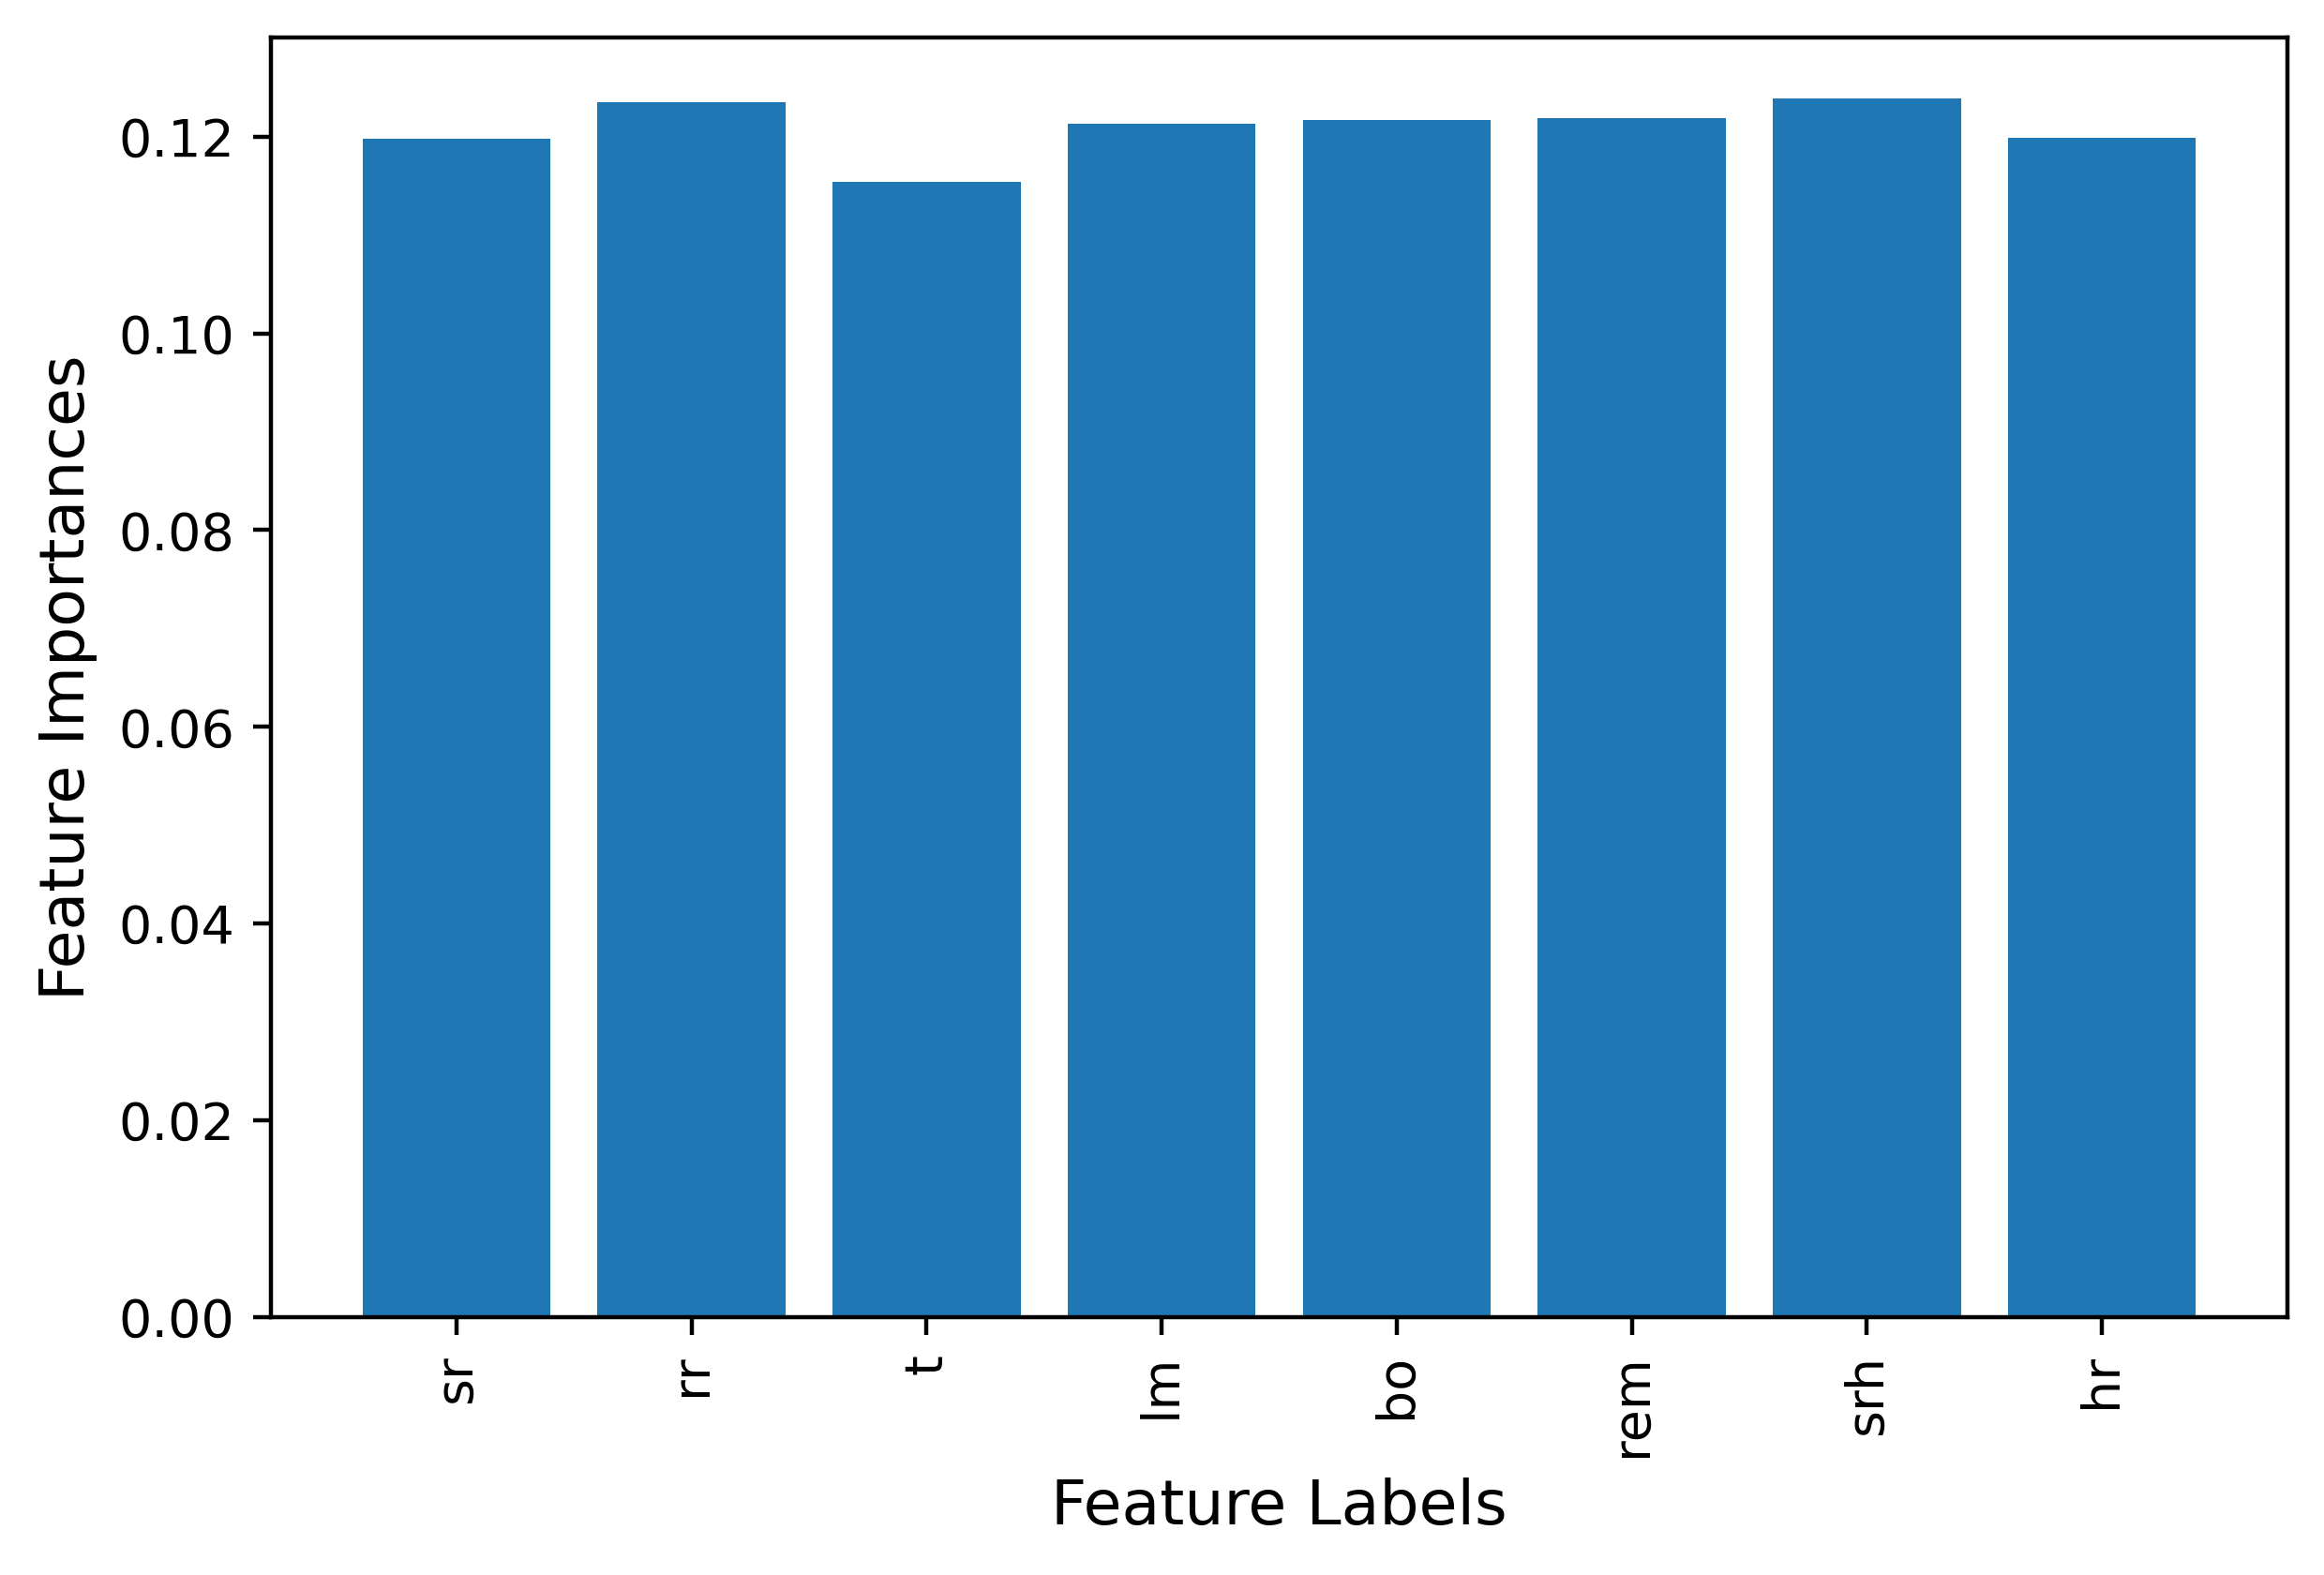

In [49]:
from sklearn.ensemble import ExtraTreesClassifier
print("ETC")
dt = ExtraTreesClassifier(n_estimators=200, random_state=5, max_depth=20)

X=data
y=target
# Training the model
dt.fit(X, y)

# Computing the importance of each feature
feature_importance = dt.feature_importances_

# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in dt.estimators_], axis = 0)
plt.figure(figsize=(6,4),dpi=400)
plt.xticks(rotation=90)
# Plotting a Bar Graph to compare the models
plt.bar(X.columns, feature_importance_normalized)
plt.xlabel('Feature Labels',fontsize=12)
plt.ylabel('Feature Importances',fontsize=12)


plt.tight_layout(pad=0)
plt.savefig('FeatureImp.pdf')
plt.show()

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [51]:
# Splitting dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.20, shuffle=True)

In [9]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200, max_depth=50) 

from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfc, data, target, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.99 accuracy with a standard deviation of 0.01


In [96]:
import time
start_time = time.time()

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200, max_depth=50) 
rfc.fit(X_train, y_train)
# calculate accuracy of class predictions
y_pred_class = rfc.predict(X_test)
print(classification_report(y_test,y_pred_class))
print(confusion_matrix(y_test,y_pred_class))


print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        26
           2       1.00      0.96      0.98        24
           3       0.97      1.00      0.98        28
           4       1.00      1.00      1.00        18

    accuracy                           0.99       126
   macro avg       0.99      0.99      0.99       126
weighted avg       0.99      0.99      0.99       126

[[30  0  0  0  0]
 [ 0 26  0  0  0]
 [ 0  0 23  1  0]
 [ 0  0  0 28  0]
 [ 0  0  0  0 18]]
--- 1.2815721035003662 seconds ---


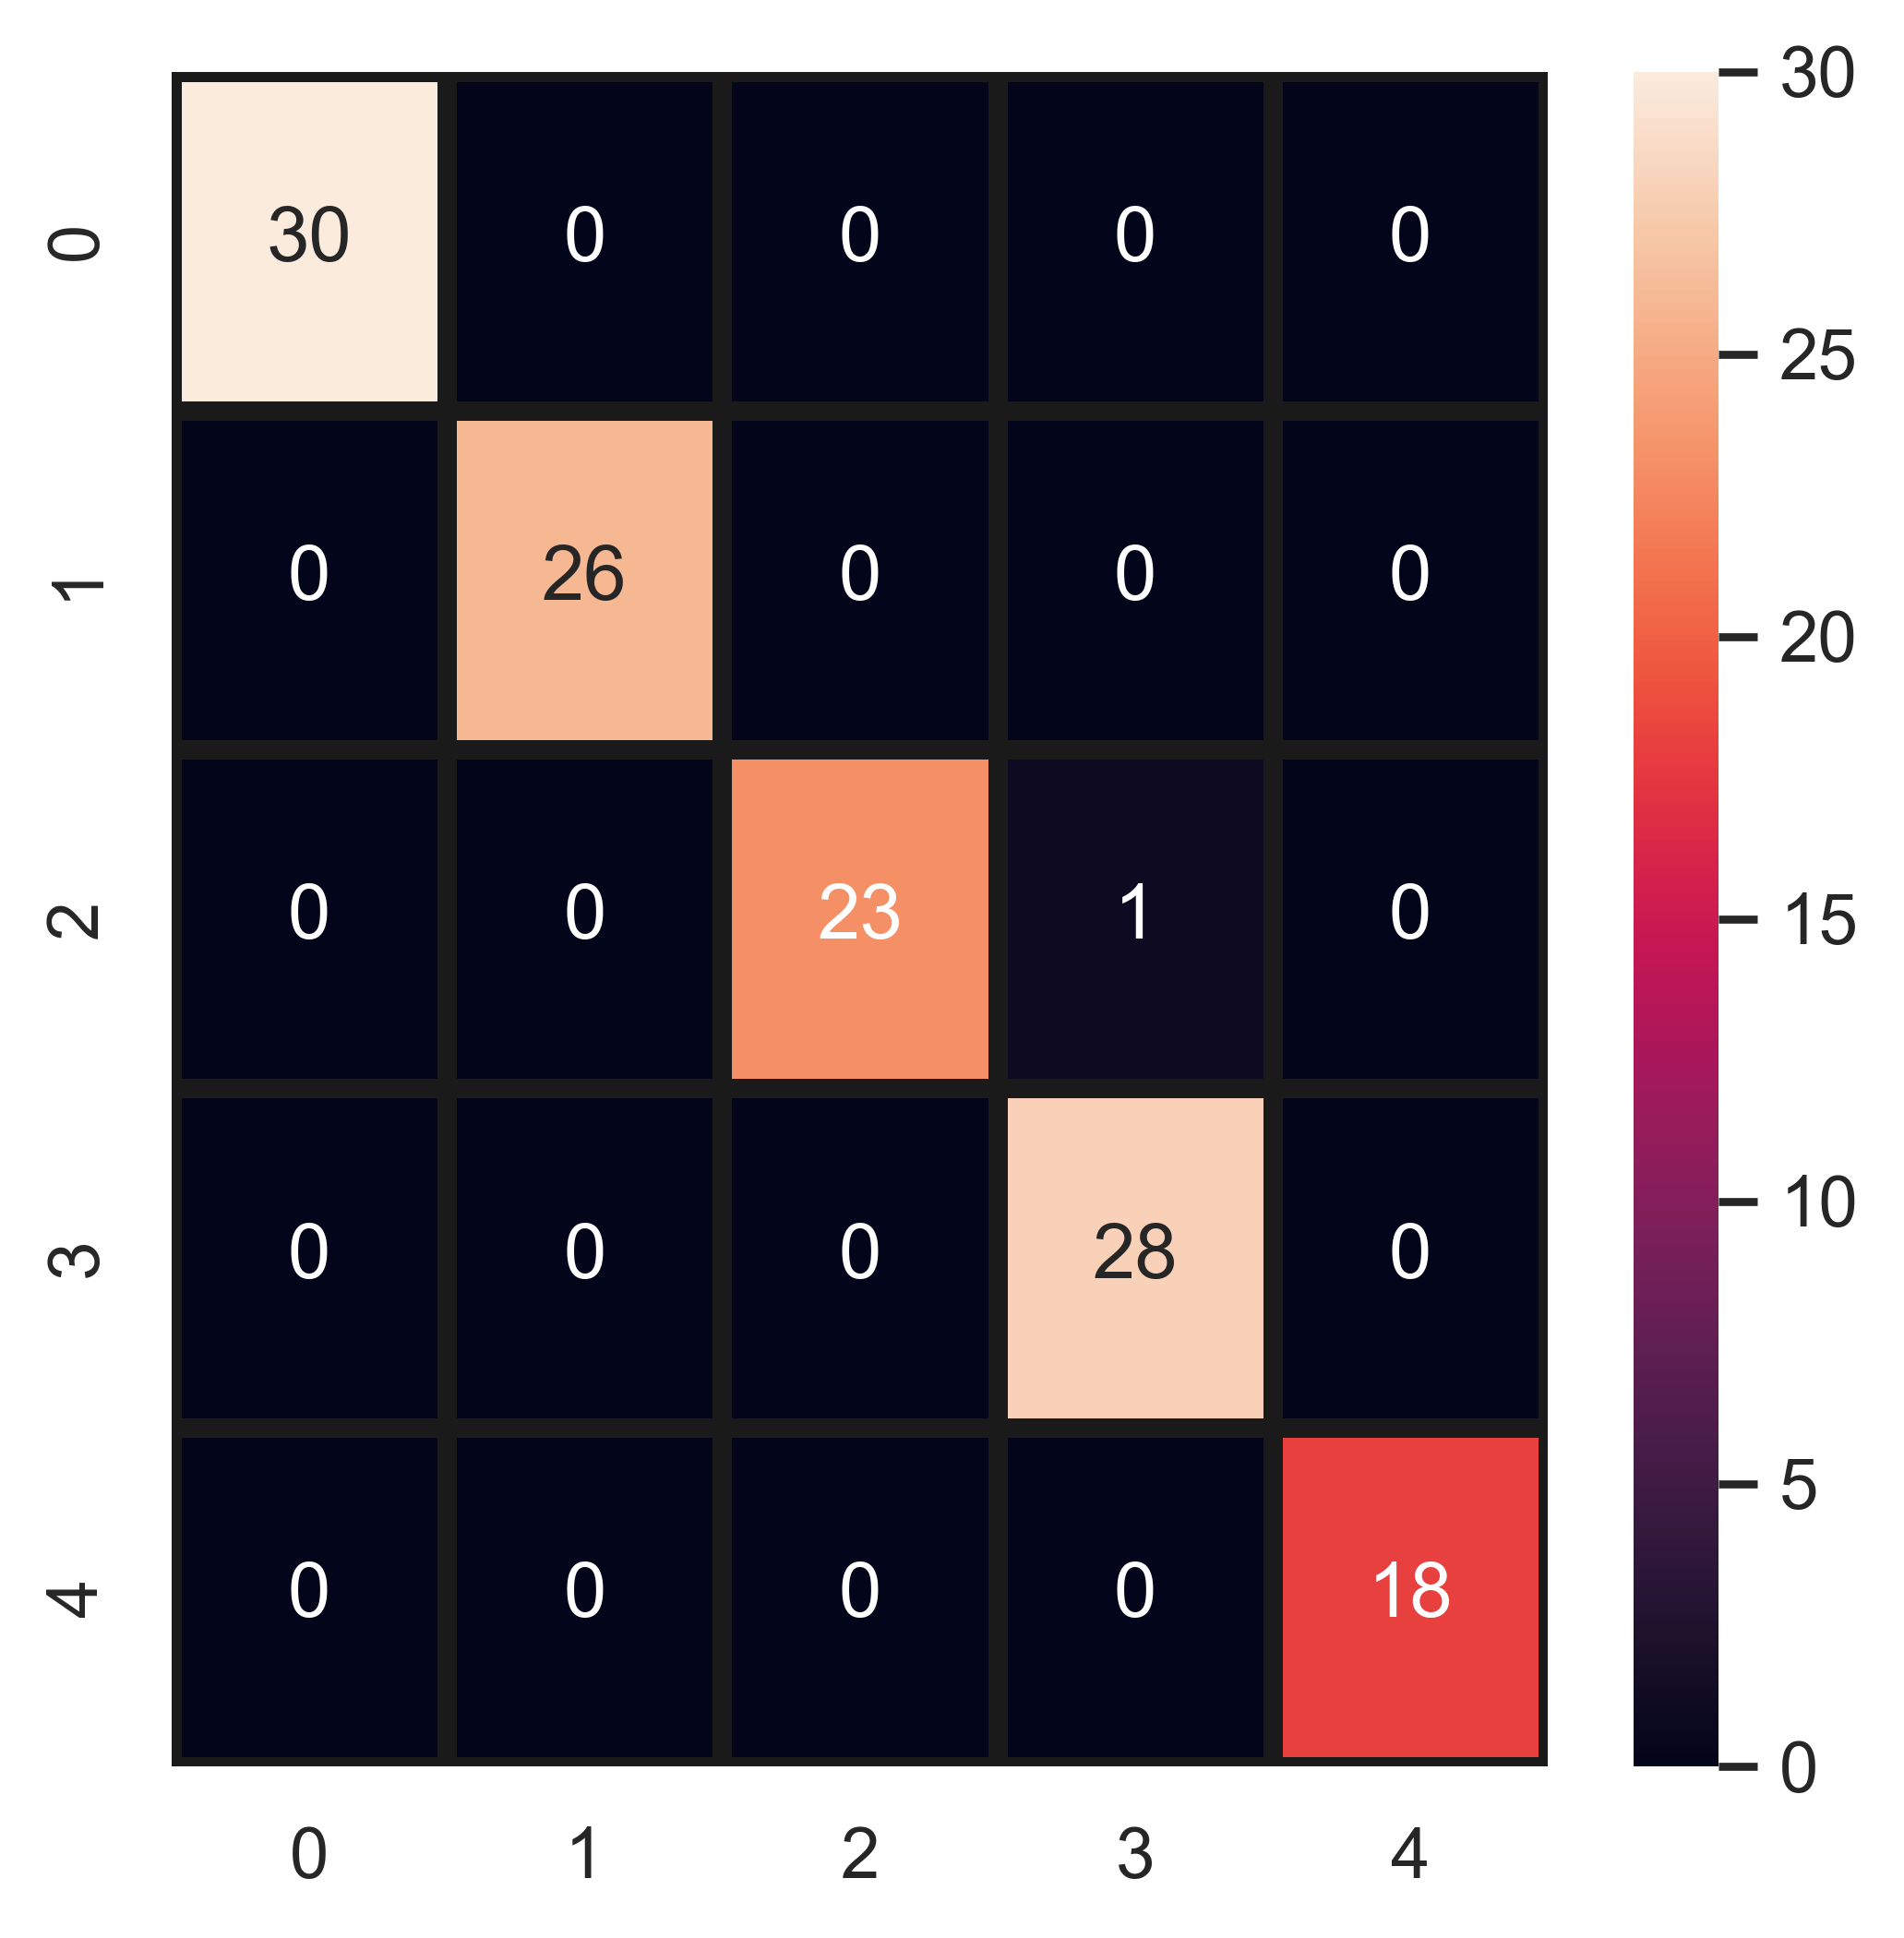

In [177]:

array4=[[30 , 0,  0 , 0,  0],
 [ 0 ,26 , 0,  0 , 0],
 [ 0 , 0 ,23 , 1 , 0],
 [ 0  ,0 , 0 ,28 , 0],
 [ 0 , 0 , 0 , 0, 18]]
RF = pd.DataFrame(array4, index = [i for i in "01234"],
                  columns = [i for i in "01234"])

i=1
def plot_sub_sentiment(Airline):
    sns.set()
    #tmp = rfc.fit(X_train, y_train.ravel())
    sns.heatmap(Airline,annot=True,fmt = "d",linecolor="k",linewidths=3)
    plt.title("",fontsize=10)

plt.figure(1,figsize=(4, 4),dpi=500)
plt.subplot(111) 
plot_sub_sentiment(RF)


plt.tight_layout(pad=0) 
# Show graphic
plt.savefig('ConRF.pdf')
plt.show()


In [10]:

from sklearn.ensemble import GradientBoostingClassifier
a = GradientBoostingClassifier(max_depth=200, learning_rate=0.2, n_estimators=50, random_state=52)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(a, data, target, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.99 accuracy with a standard deviation of 0.02


In [103]:
import time
start_time = time.time()


from sklearn.ensemble import GradientBoostingClassifier
a = GradientBoostingClassifier(max_depth=200, learning_rate=0.2, n_estimators=50, random_state=52)
a.fit(X_train, y_train)
# calculate accuracy of class predictions
y_pred_class = a.predict(X_test)
print(classification_report(y_test,y_pred_class))
print(confusion_matrix(y_test,y_pred_class))

print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        26
           2       1.00      0.96      0.98        24
           3       0.97      1.00      0.98        28
           4       1.00      1.00      1.00        18

    accuracy                           0.99       126
   macro avg       0.99      0.99      0.99       126
weighted avg       0.99      0.99      0.99       126

[[30  0  0  0  0]
 [ 0 26  0  0  0]
 [ 0  0 23  1  0]
 [ 0  0  0 28  0]
 [ 0  0  0  0 18]]
--- 0.9627573490142822 seconds ---


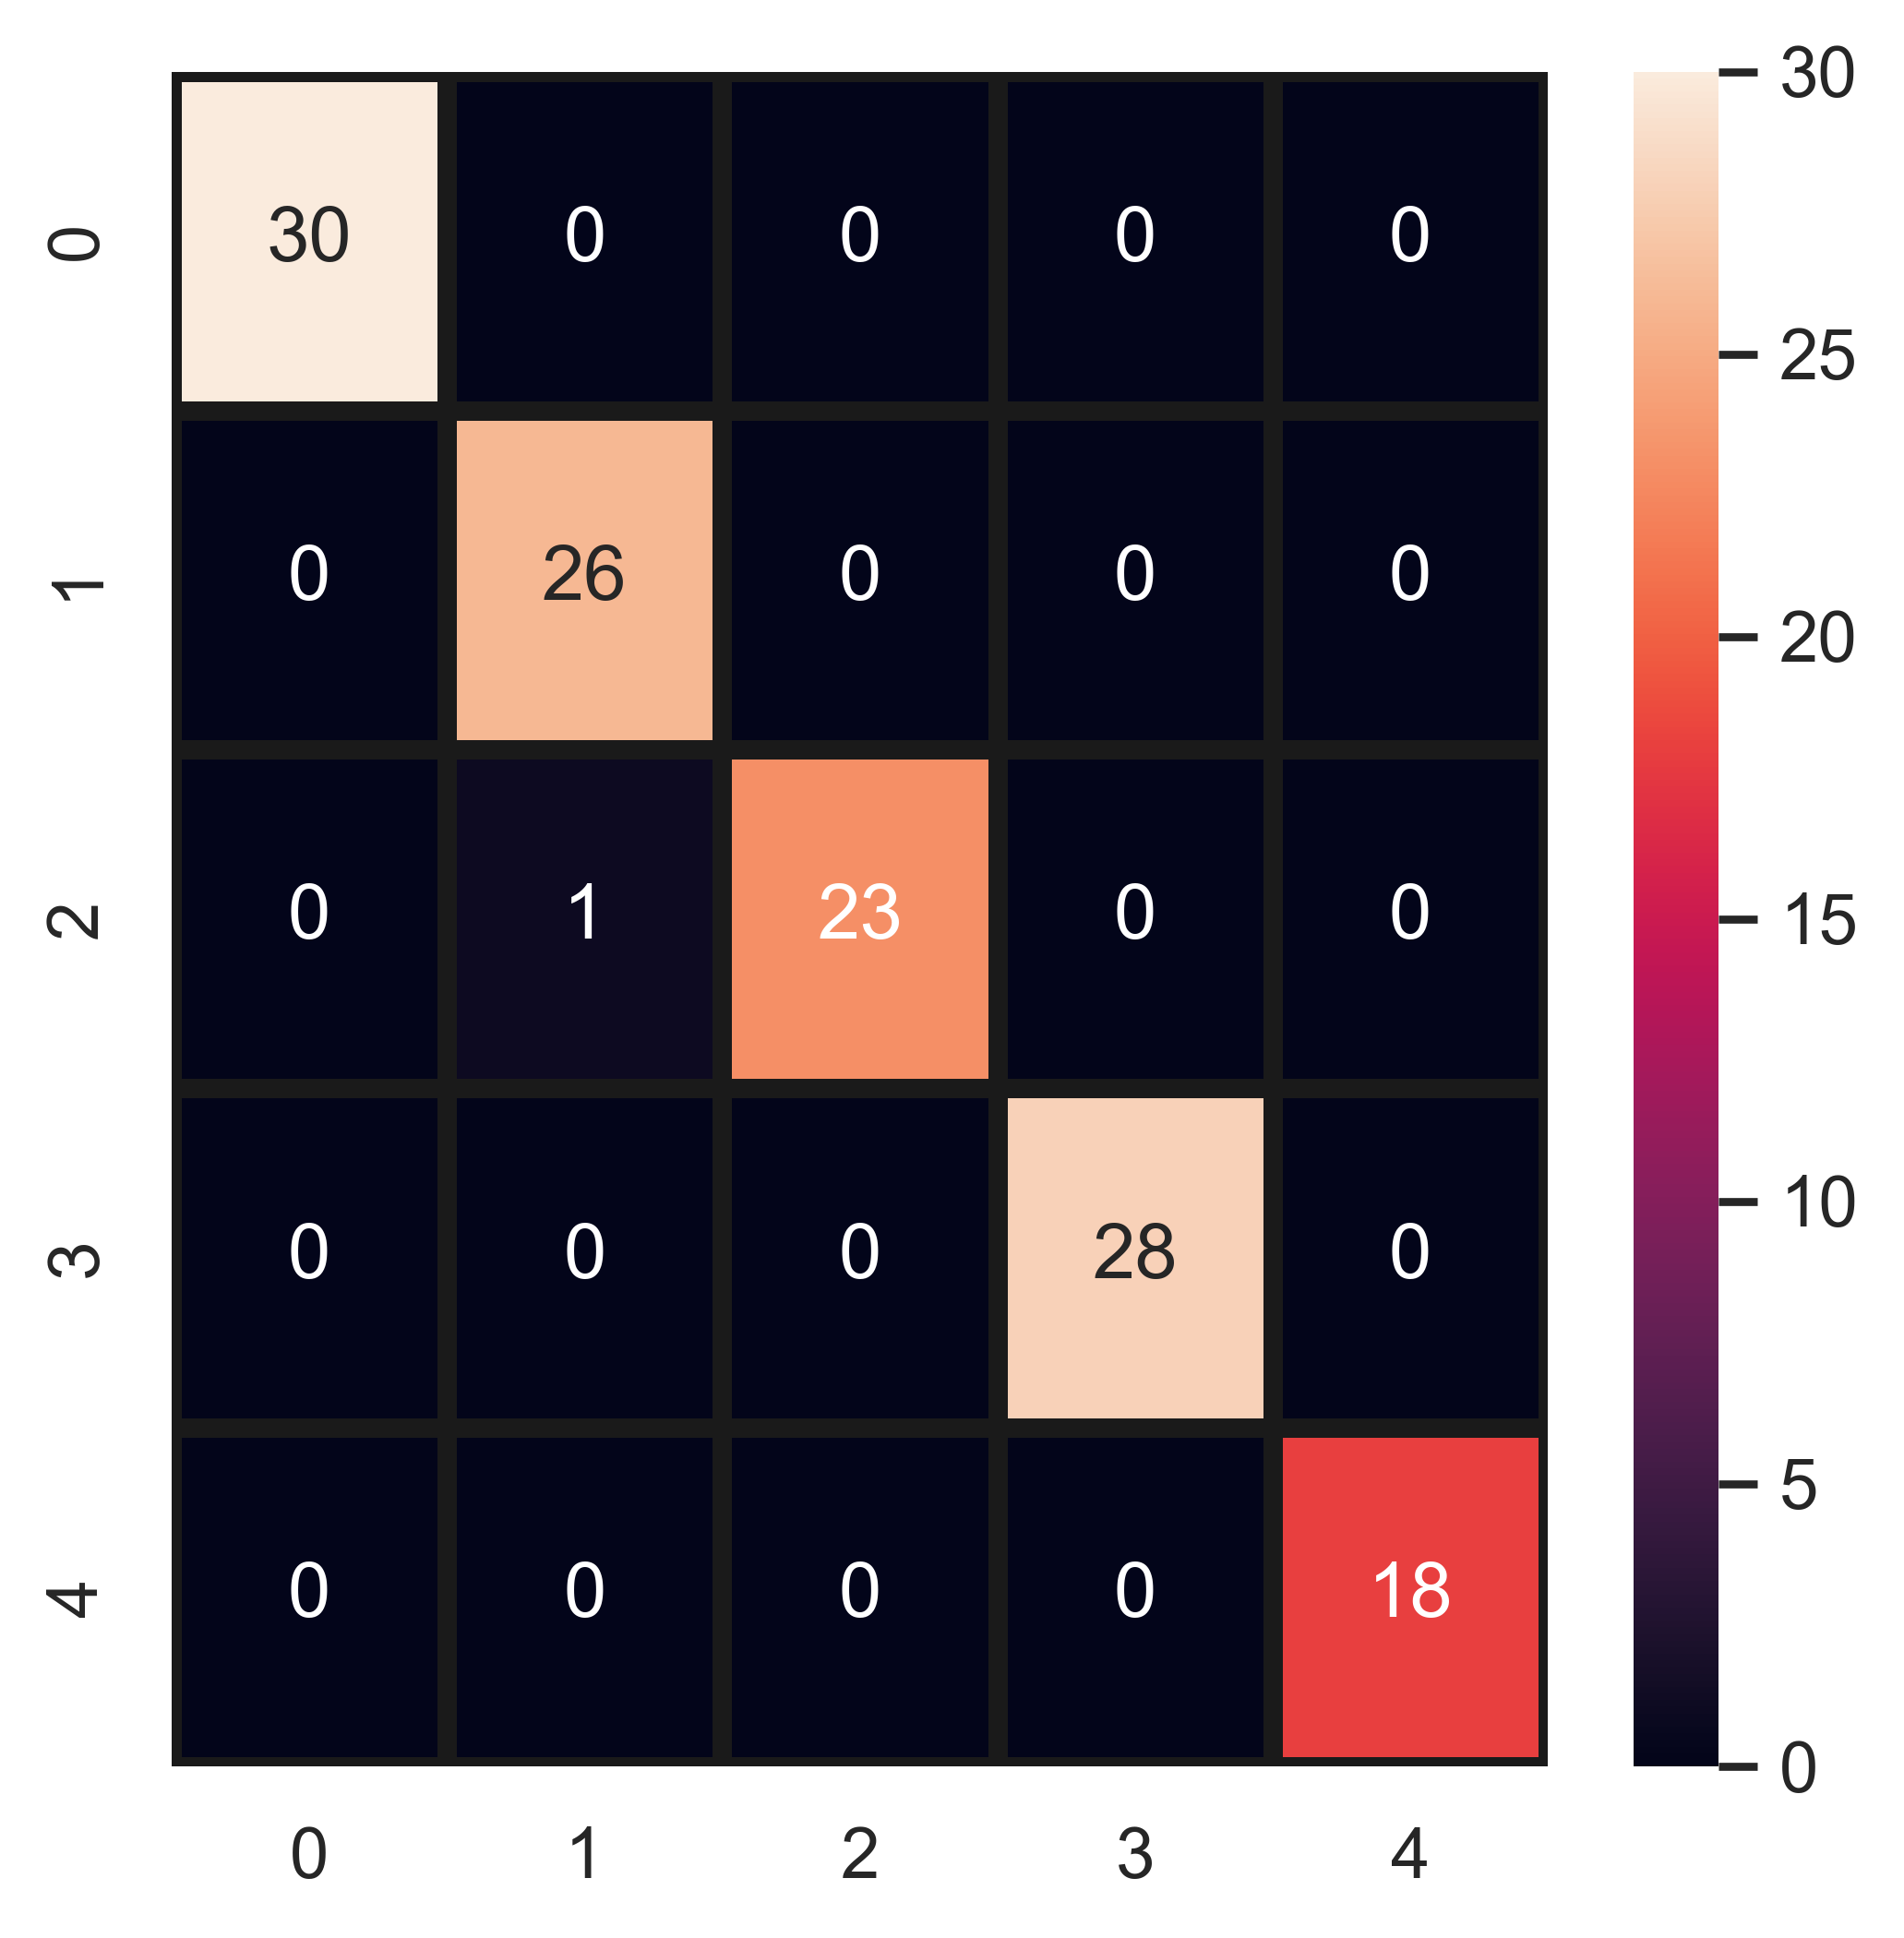

In [183]:

array4=[[30 , 0,  0 , 0,  0],
 [ 0 ,26 , 0 , 0  ,0],
 [ 0,  1 ,23 , 0 , 0],
 [ 0 , 0 , 0 ,28  ,0],
 [ 0 , 0  ,0 , 0 ,18]]
RF = pd.DataFrame(array4, index = [i for i in "01234"],
                  columns = [i for i in "01234"])

i=1
def plot_sub_sentiment(Airline):
    sns.set()
    #tmp = rfc.fit(X_train, y_train.ravel())
    sns.heatmap(Airline,annot=True,fmt = "d",linecolor="k",linewidths=3)
    plt.title("",fontsize=10)

plt.figure(1,figsize=(4, 4),dpi=500)
plt.subplot(111) 
plot_sub_sentiment(RF)


plt.tight_layout(pad=0) 
# Show graphic
plt.savefig('ConGBM.pdf')
plt.show()


In [11]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
print("ADA")
xgb = AdaBoostClassifier(n_estimators=200, random_state=5,learning_rate=0.5)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb, data, target, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

ADA
0.67 accuracy with a standard deviation of 0.12


In [182]:
import time
start_time = time.time()

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
print("ADA")
xgb = AdaBoostClassifier(n_estimators=200, random_state=5,learning_rate=0.5)
xgb_pred = xgb.fit(X_train, y_train).predict(X_test)  
print(classification_report(y_test,xgb_pred))
print(confusion_matrix(y_test,xgb_pred))

print("--- %s seconds ---" % (time.time() - start_time))

ADA
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.50      1.00      0.67        21
           2       0.97      1.00      0.99        34
           3       1.00      0.96      0.98        24
           4       1.00      1.00      1.00        26

    accuracy                           0.83       126
   macro avg       0.69      0.79      0.73       126
weighted avg       0.74      0.83      0.77       126

[[ 0 21  0  0  0]
 [ 0 21  0  0  0]
 [ 0  0 34  0  0]
 [ 0  0  1 23  0]
 [ 0  0  0  0 26]]
--- 5.998065710067749 seconds ---


C:\Users\Sohail_Comp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sohail_Comp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sohail_Comp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


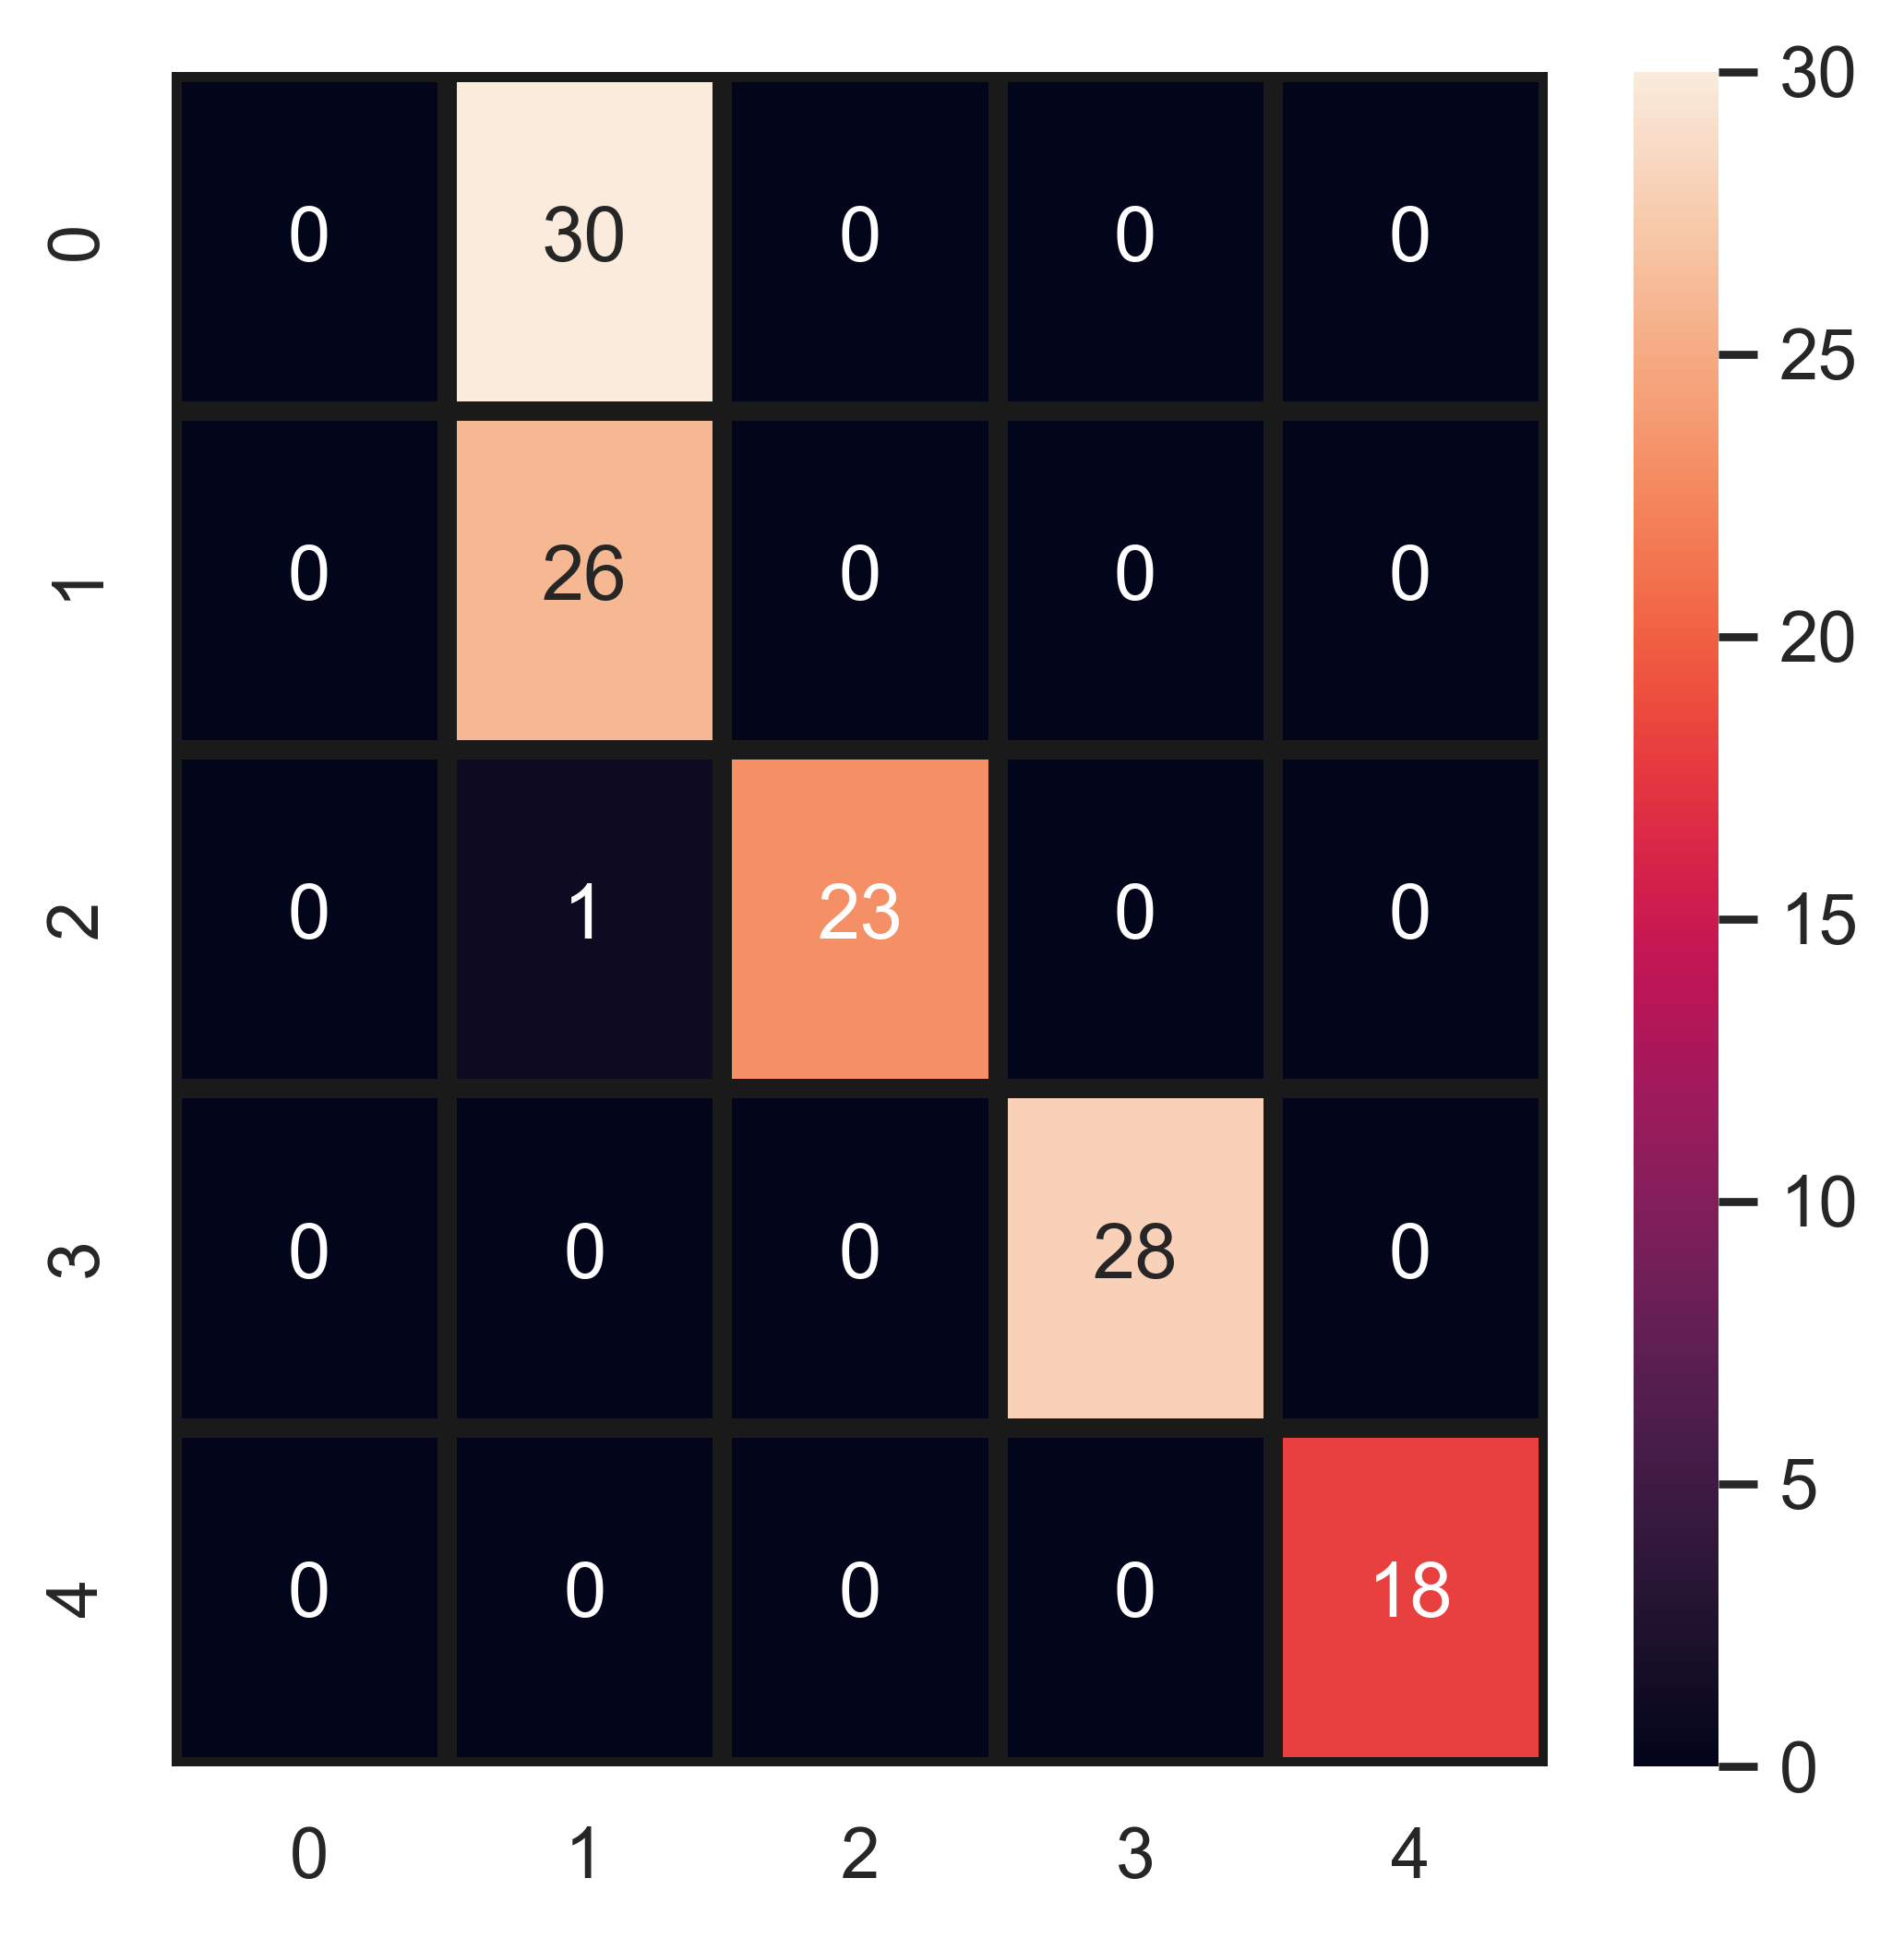

In [175]:

array4=[[ 0 ,21,  0 , 0,  0],
 [ 0 ,21 , 0 , 0  ,0],
 [ 0  0 ,34 , 0  ,0],
 [ 0  0 , 1 ,23 , 0],
 [ 0  0 , 0 , 0 ,26]]
RF = pd.DataFrame(array4, index = [i for i in "01234"],
                  columns = [i for i in "01234"])

i=1
def plot_sub_sentiment(Airline):
    sns.set()
    #tmp = rfc.fit(X_train, y_train.ravel())
    sns.heatmap(Airline,annot=True,fmt = "d",linecolor="k",linewidths=3)
    plt.title("",fontsize=10)

plt.figure(1,figsize=(4, 4),dpi=500)
plt.subplot(111) 
plot_sub_sentiment(RF)


plt.tight_layout(pad=0) 
# Show graphic
plt.savefig('ConADA.pdf')
plt.show()


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# 2. instantiate a logistic regression model
logreg = LogisticRegression( solver='saga',multi_class='ovr',C=500.0)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, data, target, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

C:\Users\Sohail_Comp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Sohail_Comp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Sohail_Comp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Sohail_Comp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Sohail_Comp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Sohail_Comp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:35

0.95 accuracy with a standard deviation of 0.03


C:\Users\Sohail_Comp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [104]:
import time
start_time = time.time()

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# 2. instantiate a logistic regression model
logreg = LogisticRegression( solver='saga',multi_class='ovr',C=500.0)
# 3. train the model using X_train_dtm
x=logreg.fit(X_train, y_train)
# 4. make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test)
print(classification_report(y_test,y_pred_class))
print(confusion_matrix(y_test,y_pred_class))

print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.87      1.00      0.93        26
           2       1.00      0.79      0.88        24
           3       0.97      1.00      0.98        28
           4       1.00      1.00      1.00        18

    accuracy                           0.96       126
   macro avg       0.97      0.96      0.96       126
weighted avg       0.96      0.96      0.96       126

[[30  0  0  0  0]
 [ 0 26  0  0  0]
 [ 0  4 19  1  0]
 [ 0  0  0 28  0]
 [ 0  0  0  0 18]]
--- 0.11104846000671387 seconds ---


C:\Users\Sohail_Comp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Sohail_Comp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Sohail_Comp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Sohail_Comp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Sohail_Comp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


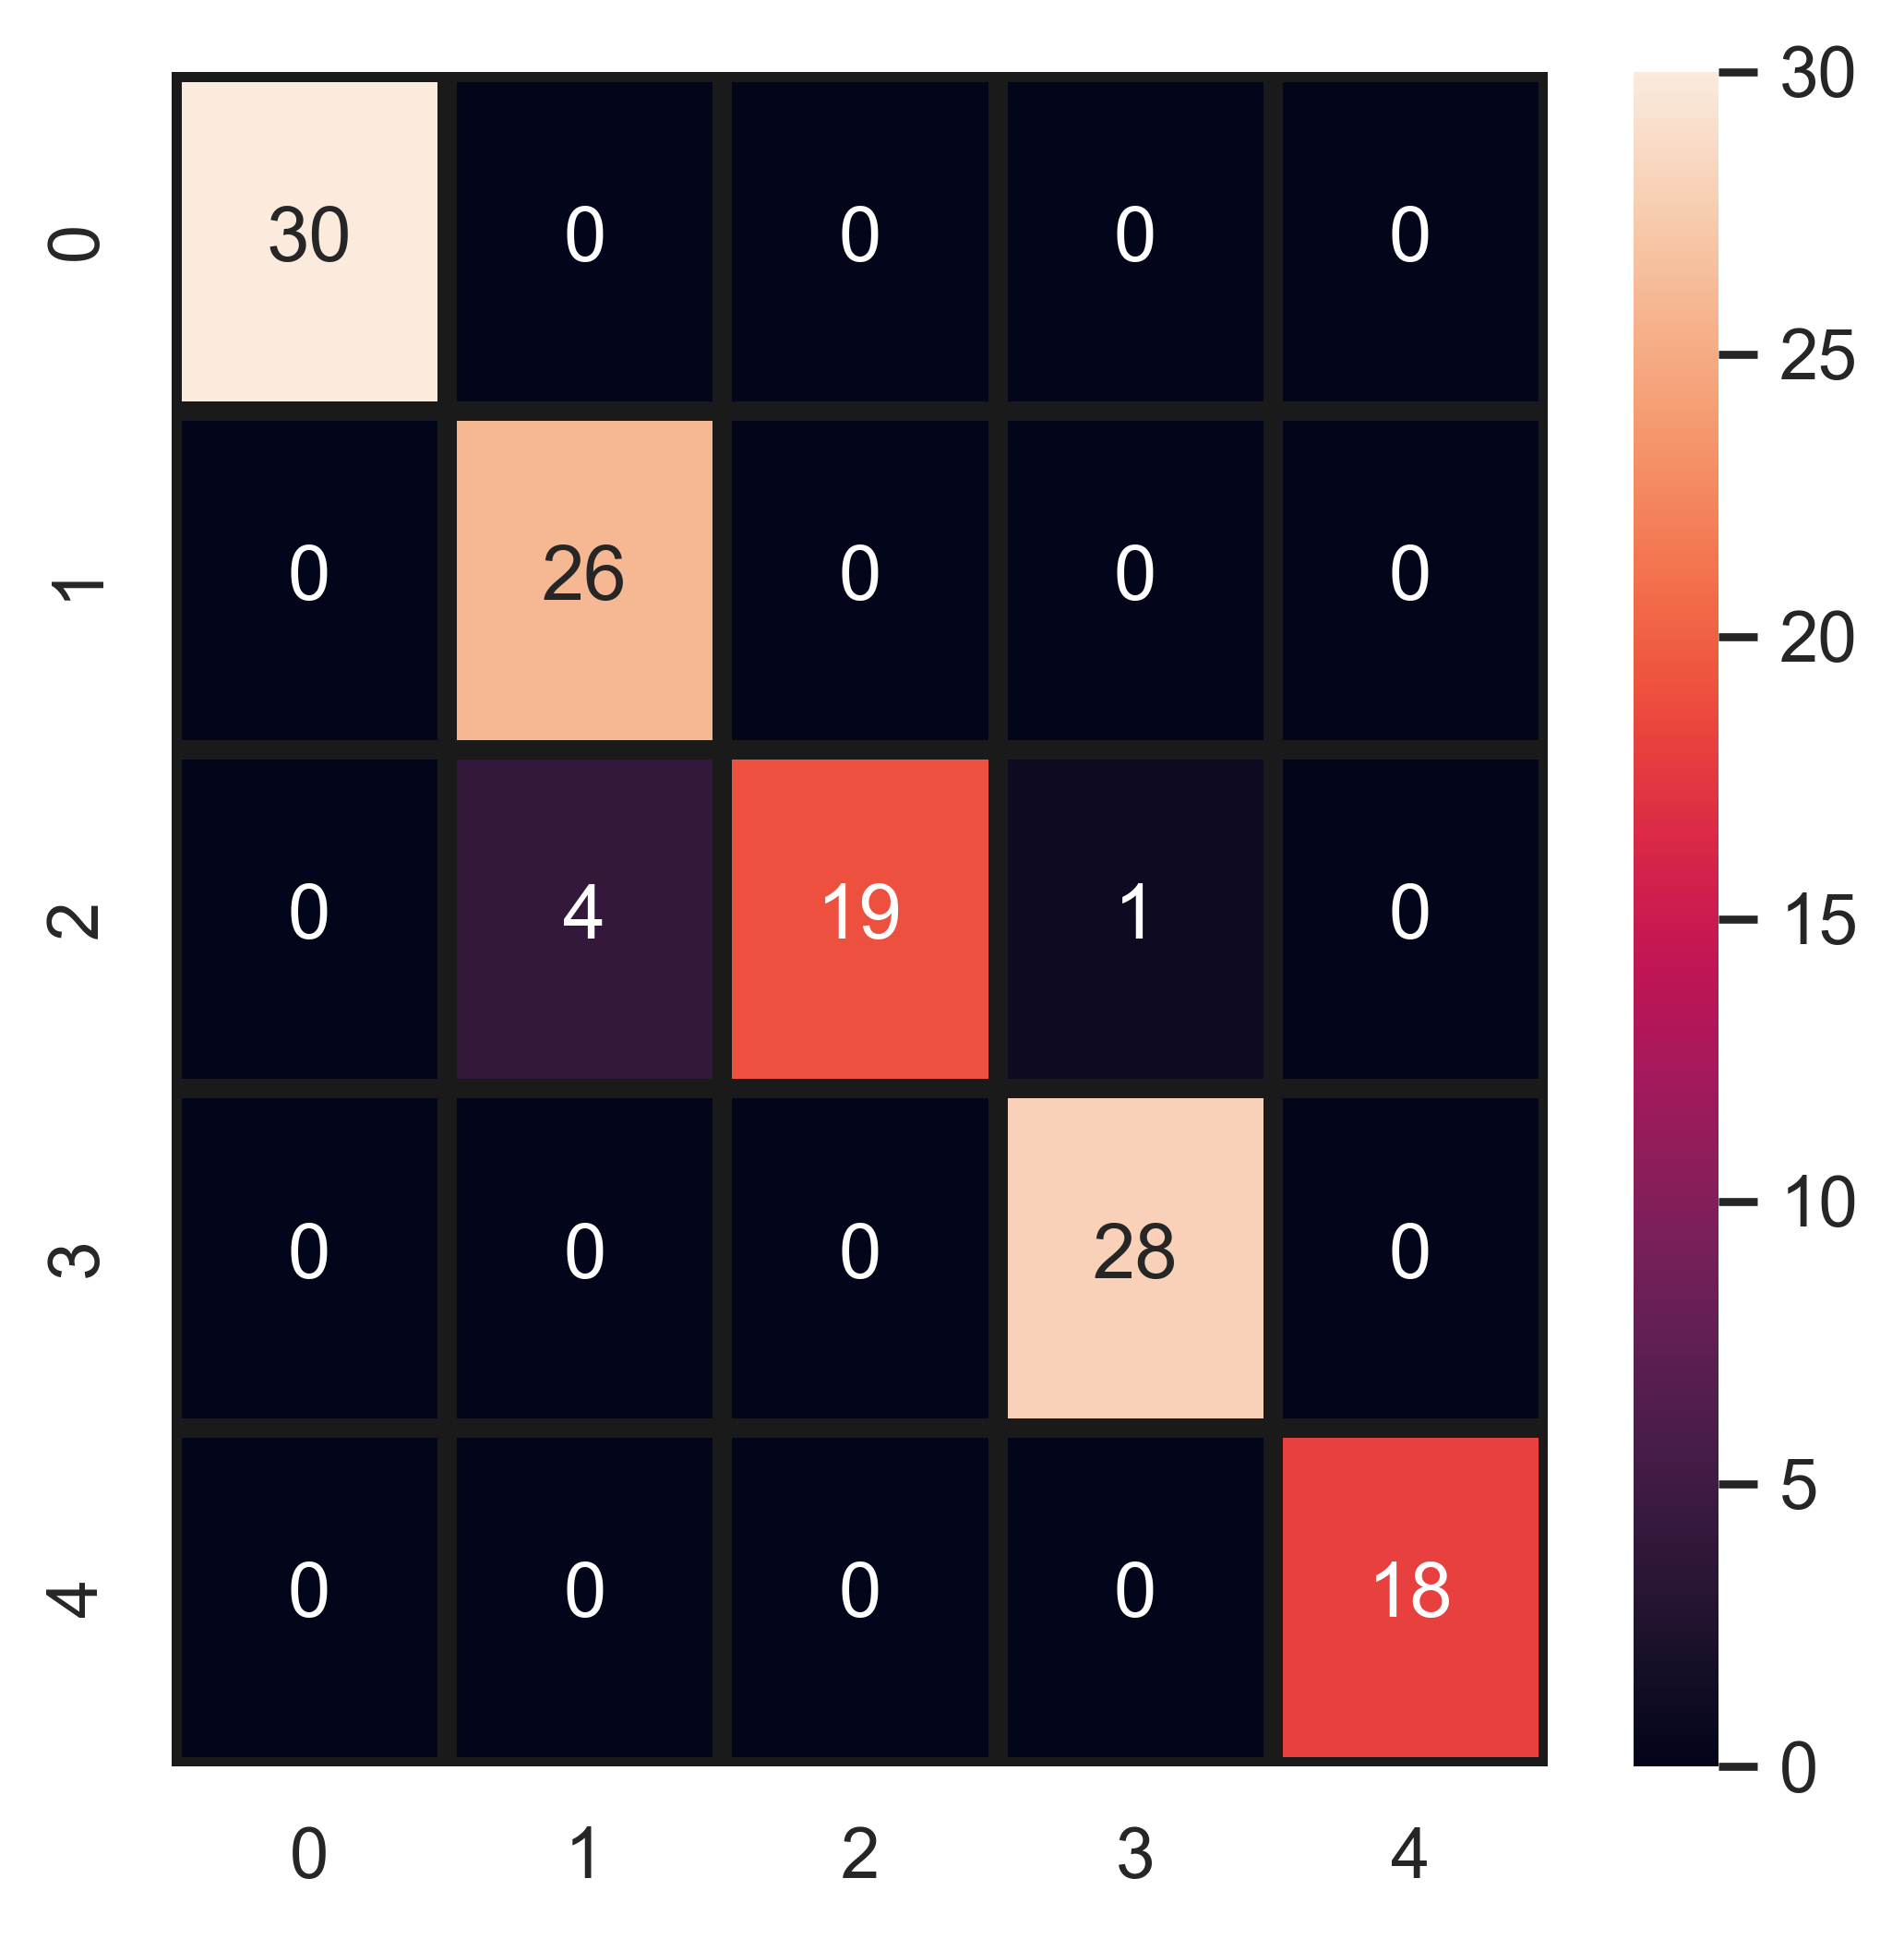

In [174]:

array4=[[30,  0,  0,  0 , 0],
 [ 0 ,26,  0 , 0 , 0],
 [ 0 , 4, 19 , 1,  0],
 [ 0 , 0 , 0 ,28 , 0],
 [ 0  ,0 , 0  ,0 ,18]]
RF = pd.DataFrame(array4, index = [i for i in "01234"],
                  columns = [i for i in "01234"])

i=1
def plot_sub_sentiment(Airline):
    sns.set()
    #tmp = rfc.fit(X_train, y_train.ravel())
    sns.heatmap(Airline,annot=True,fmt = "d",linecolor="k",linewidths=3)
    plt.title("",fontsize=10)

plt.figure(1,figsize=(4, 4),dpi=500)
plt.subplot(111) 
plot_sub_sentiment(RF)


plt.tight_layout(pad=0) 
# Show graphic
plt.savefig('ConLR.pdf')
plt.show()


In [13]:
from sklearn.svm import LinearSVC
print("SVC")
svm = LinearSVC()

from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm, data, target, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

SVC


C:\Users\Sohail_Comp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Sohail_Comp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Sohail_Comp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Sohail_Comp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Sohail_Comp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Sohail_Comp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear fail

0.96 accuracy with a standard deviation of 0.04


C:\Users\Sohail_Comp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Sohail_Comp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [113]:
import time
start_time = time.time()

from sklearn.svm import LinearSVC
print("SVC")
svm = LinearSVC()
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

print("--- %s seconds ---" % (time.time() - start_time))

SVC
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      0.77      0.87        26
           2       0.80      1.00      0.89        24
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        18

    accuracy                           0.95       126
   macro avg       0.96      0.95      0.95       126
weighted avg       0.96      0.95      0.95       126

[[30  0  0  0  0]
 [ 0 20  6  0  0]
 [ 0  0 24  0  0]
 [ 0  0  0 28  0]
 [ 0  0  0  0 18]]
--- 0.0760033130645752 seconds ---


C:\Users\Sohail_Comp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


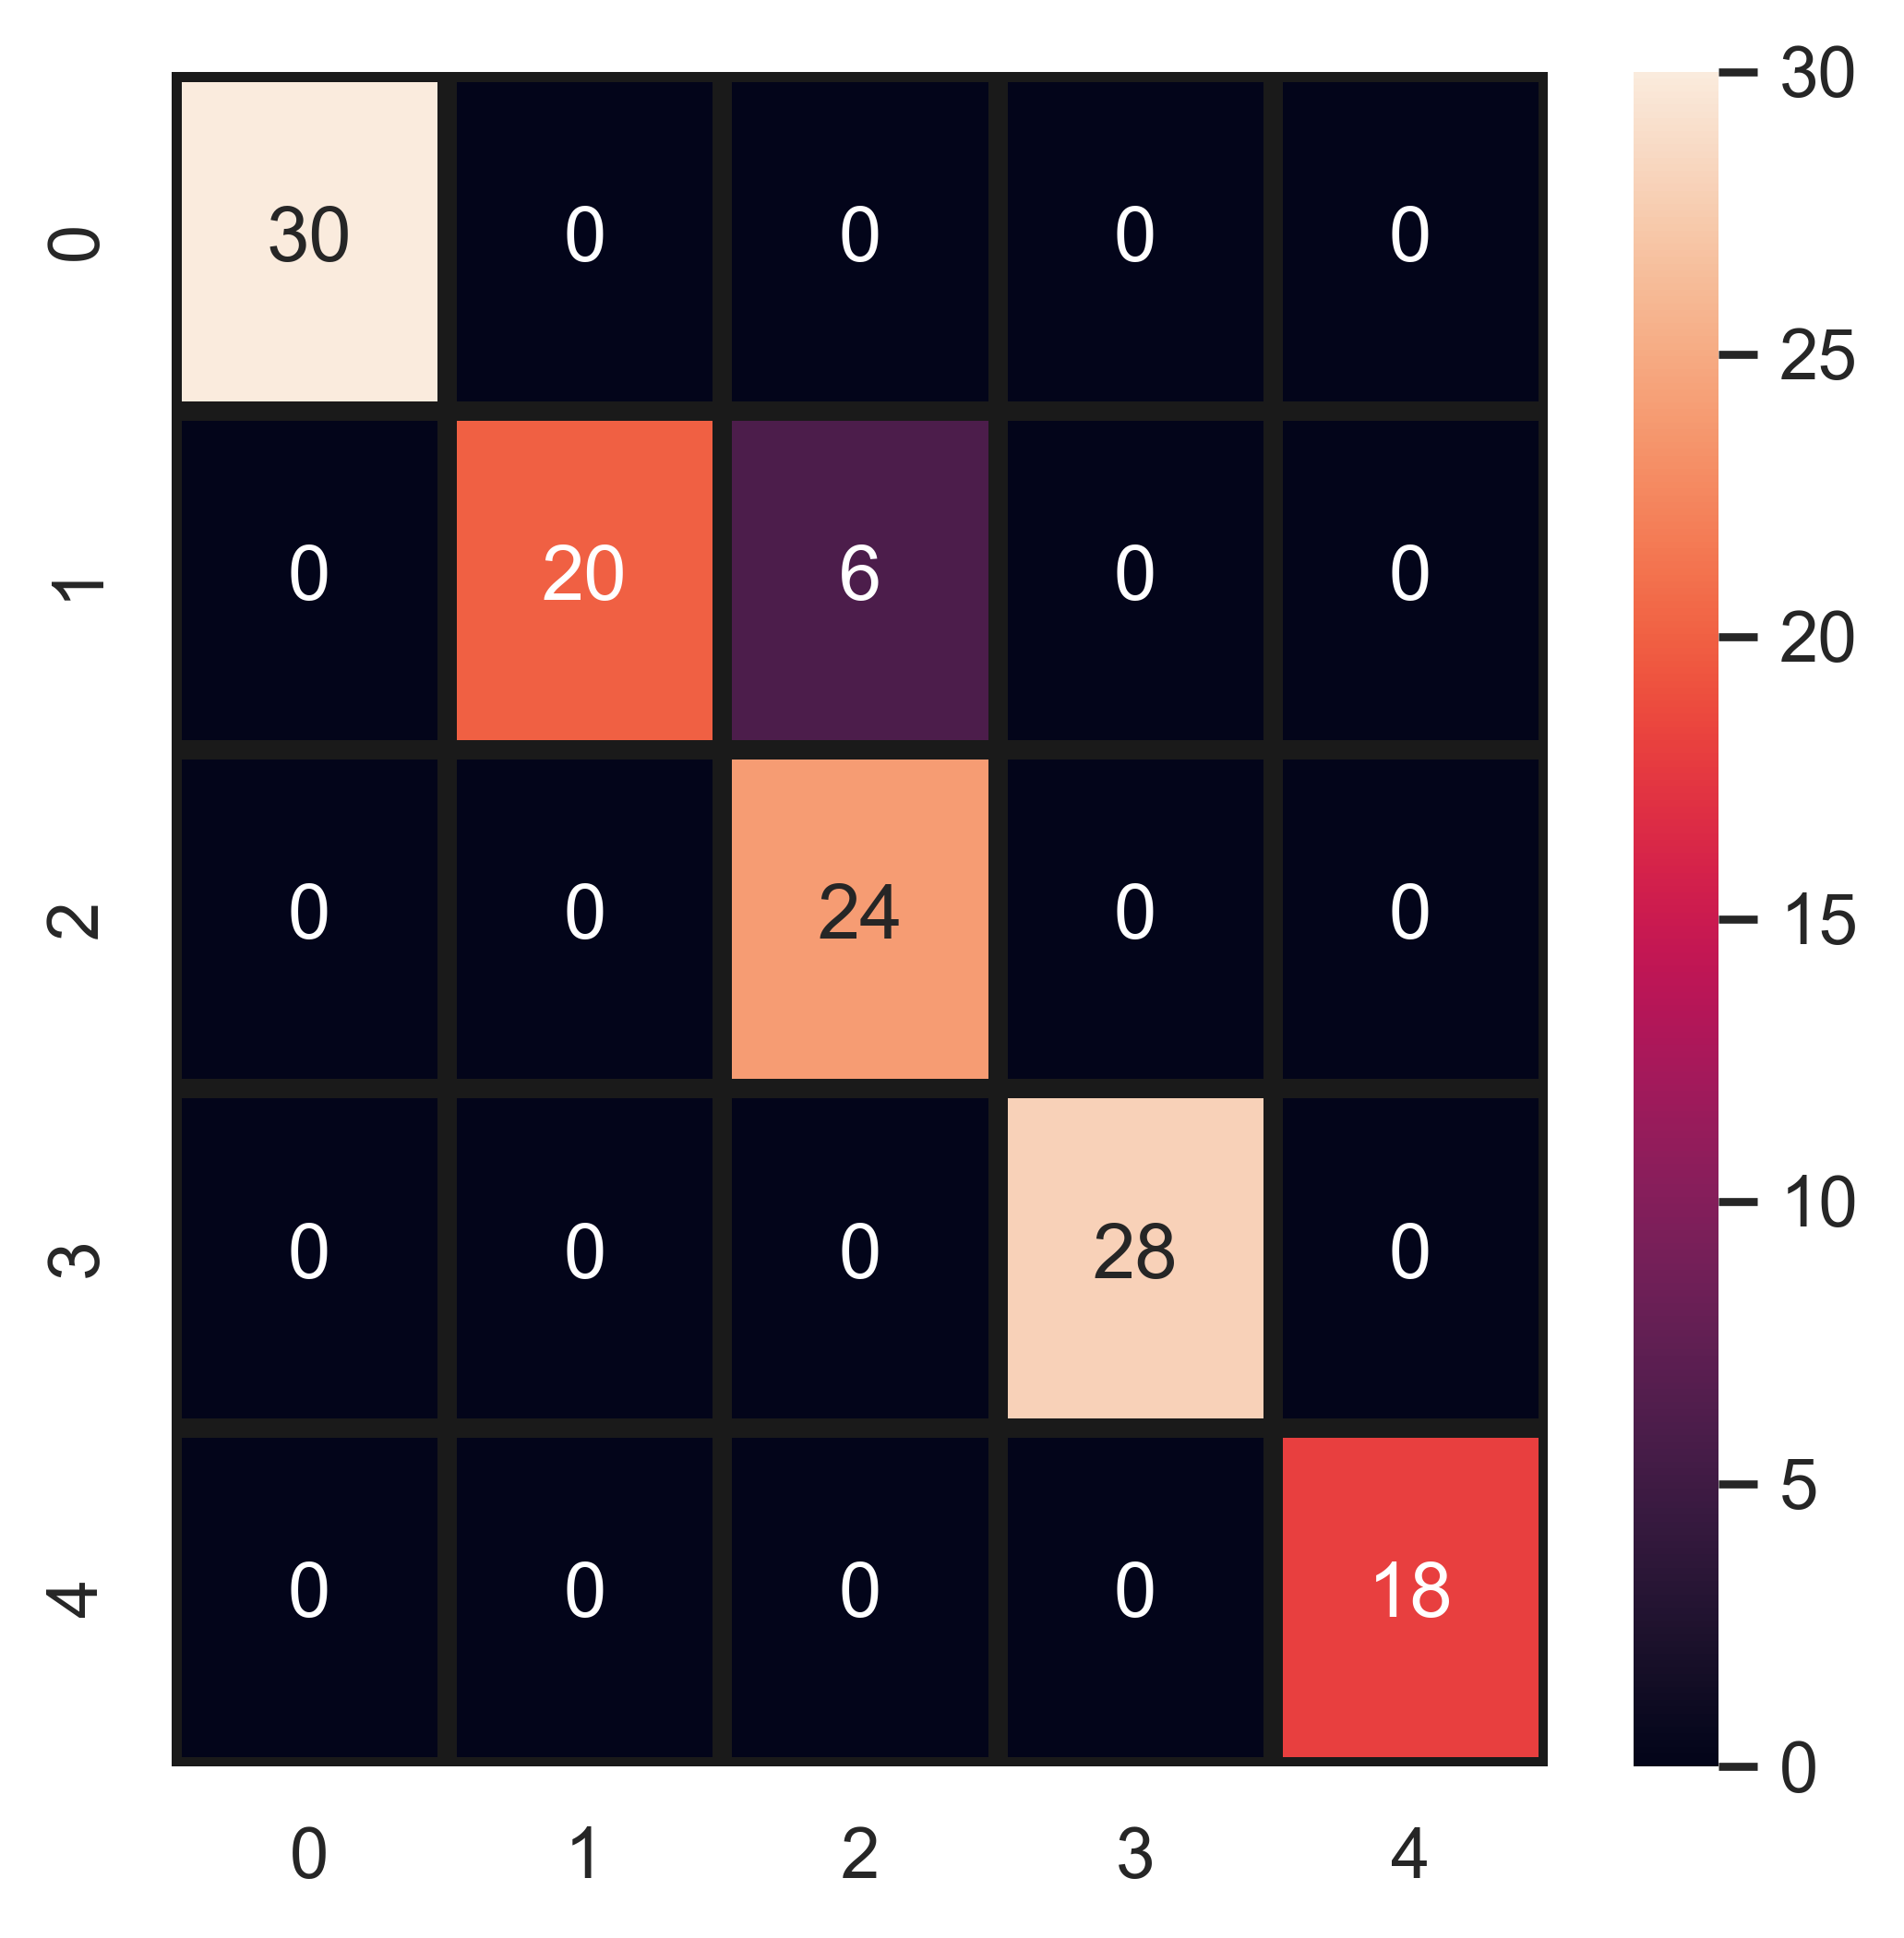

In [172]:

array4=[[30,  0 , 0,  0 , 0],
 [ 0, 20 , 6 , 0  ,0],
 [ 0 , 0 ,24 , 0 , 0],
 [ 0 , 0 , 0 ,28 , 0],
 [ 0 , 0  ,0 , 0, 18]]
RF = pd.DataFrame(array4, index = [i for i in "01234"],
                  columns = [i for i in "01234"])

i=1
def plot_sub_sentiment(Airline):
    sns.set()
    #tmp = rfc.fit(X_train, y_train.ravel())
    sns.heatmap(Airline,annot=True,fmt = "d",linecolor="k",linewidths=3)
    plt.title("",fontsize=10)

plt.figure(1,figsize=(4, 4),dpi=500)
plt.subplot(111) 
plot_sub_sentiment(RF)


plt.tight_layout(pad=0) 
# Show graphic
plt.savefig('ConSVM.pdf')
plt.show()


In [14]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
r1 = LogisticRegression(random_state=1000, solver='saga',multi_class='multinomial',C=3.0)
r2 = RandomForestClassifier(n_estimators=200, random_state=5, max_depth=50) 


er = VotingClassifier([('lr', r1),('rf', r2)],voting="soft")

from sklearn.model_selection import cross_val_score
scores = cross_val_score(er, data, target, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

C:\Users\Sohail_Comp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Sohail_Comp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Sohail_Comp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Sohail_Comp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Sohail_Comp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Sohail_Comp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:35

1.00 accuracy with a standard deviation of 0.00


In [116]:
import time
start_time = time.time()

import numpy as np
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
r1 = LogisticRegression(random_state=1000, solver='saga',multi_class='multinomial',C=3.0)
r2 = RandomForestClassifier(n_estimators=200, random_state=5, max_depth=50) 


er = VotingClassifier([('lr', r1),('rf', r2)],voting="soft")

x=er.fit(X_train, y_train)

y_pred_class = er.predict(X_test)
print(classification_report(y_test,y_pred_class))
print(confusion_matrix(y_test,y_pred_class))

print("--- %s seconds ---" % (time.time() - start_time))

C:\Users\Sohail_Comp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        18

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

[[30  0  0  0  0]
 [ 0 26  0  0  0]
 [ 0  0 24  0  0]
 [ 0  0  0 28  0]
 [ 0  0  0  0 18]]
--- 1.318474292755127 seconds ---


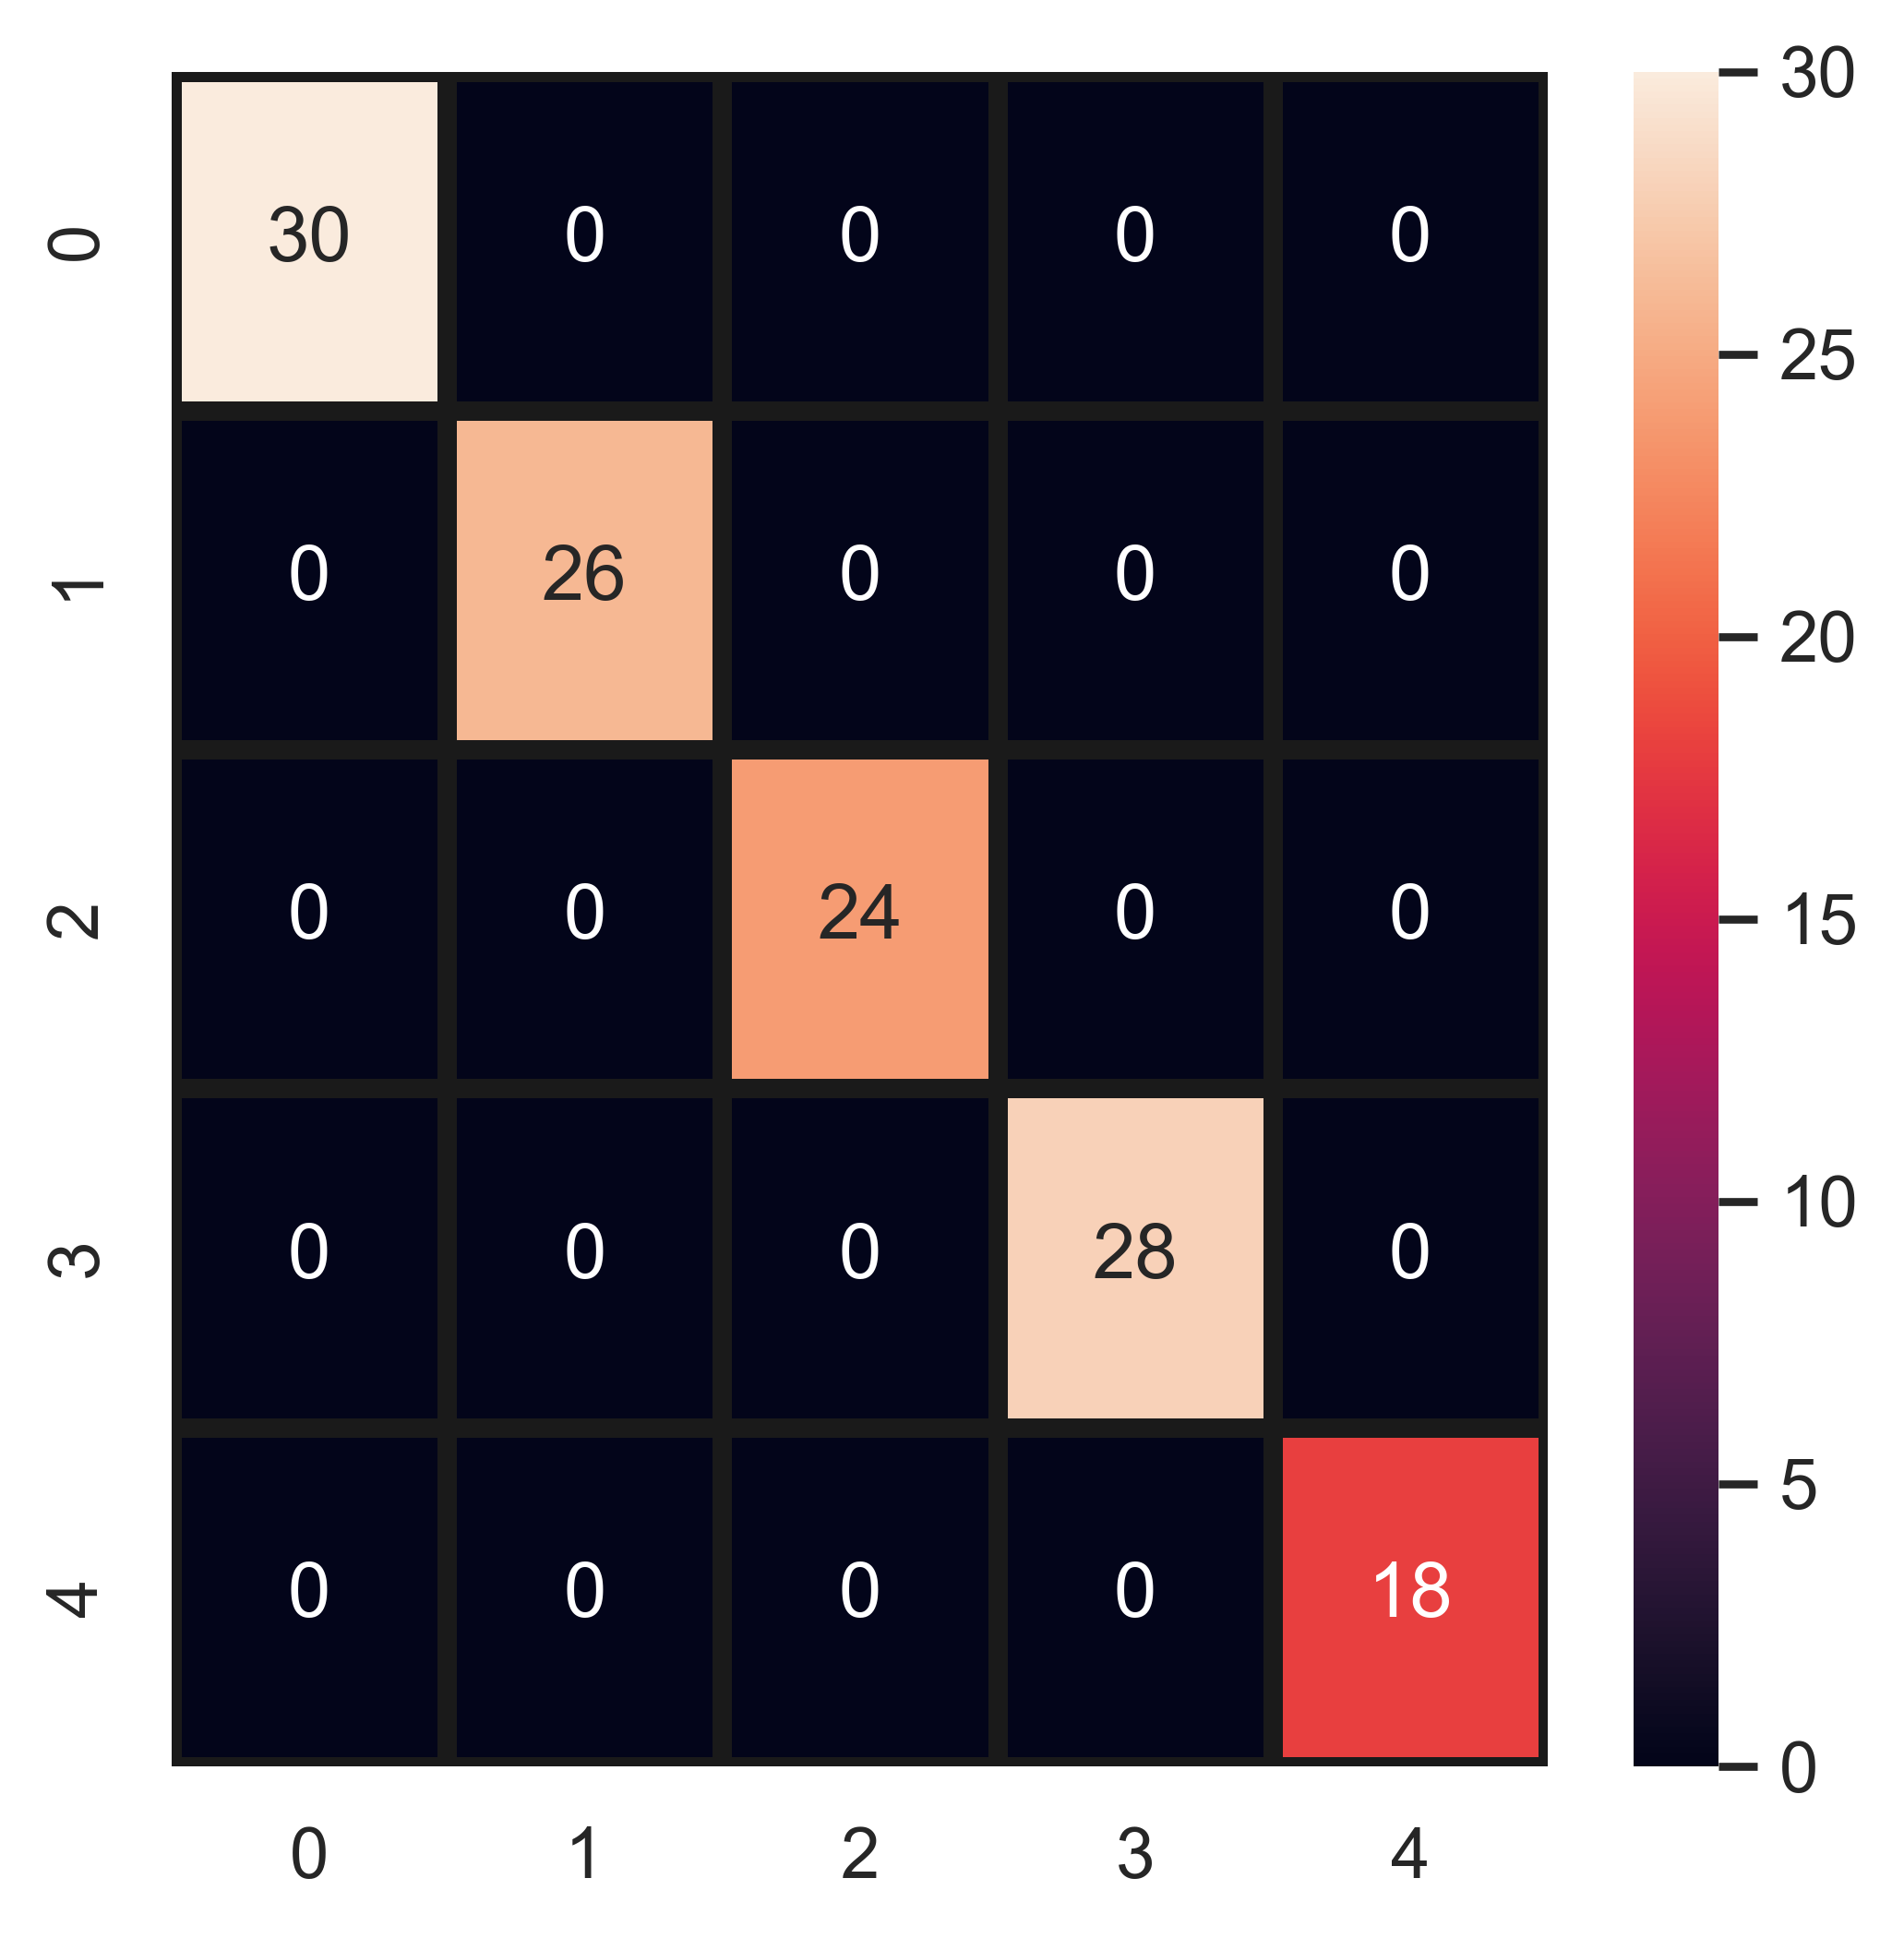

In [171]:

array4=[[30 , 0,  0,  0 , 0],
 [ 0, 26,  0,  0,  0],
 [ 0  ,0, 24  ,0,  0],
 [ 0 , 0  ,0 ,28 , 0],
 [ 0 , 0 , 0 , 0, 18]]
RF = pd.DataFrame(array4, index = [i for i in "01234"],
                  columns = [i for i in "01234"])

i=1
def plot_sub_sentiment(Airline):
    sns.set()
    #tmp = rfc.fit(X_train, y_train.ravel())
    sns.heatmap(Airline,annot=True,fmt = "d",linecolor="k",linewidths=3)
    plt.title("",fontsize=10)

plt.figure(1,figsize=(4, 4),dpi=500)
plt.subplot(111) 
plot_sub_sentiment(RF)


plt.tight_layout(pad=0) 
# Show graphic
plt.savefig('ConHB.pdf')
plt.show()


In [117]:
import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import glob
import cv2
import tensorflow as tf
from keras import layers
from keras.layers import Dropout , Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.initializers import glorot_uniform
from sklearn.model_selection import train_test_split
import keras.backend as K
from sklearn.utils import shuffle
# importing all necessary libraries to run the code
import re,string
import numpy as np
import pandas as pd
import keras_metrics
import tensorflow.keras
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation,Embedding


In [118]:
>>> from sklearn import preprocessing
>>> le = preprocessing.LabelEncoder()
le = preprocessing.LabelEncoder()
y = le.fit_transform(target)

In [155]:
import time
start_time = time.time()

from keras import optimizers
import tensorflow.keras
tokenizer = tensorflow.keras.preprocessing.text.Tokenizer(num_words=5000,lower=False)
#tokenizer.fit_on_texts(X_train_res.values)
#print(tokenizer.word_index)  # To see the dicstionary
#X = tokenizer.texts_to_sequences(X_train_res.values)
#X = tensorflow.keras.preprocessing.sequence.pad_sequences(X_train_res)
#Deep Learning Network Structure
model_conv = Sequential()
model_conv.add(Embedding(5000,100, input_length=data.shape[1]))
model_conv.add(Dropout(0.5))
model_conv.add(LSTM(100))
model_conv.add(Dense(5, activation='softmax'))
model_conv.compile(loss='categorical_crossentropy', optimizer='adam',   metrics=['accuracy','mae','mse',keras_metrics.precision(), keras_metrics.recall(),keras_metrics.f1_score()])
#Y = data.Reviewer_Score
Y = pd.get_dummies(y).values

X_train, X_valid, Y_train, Y_valid = train_test_split(data,Y, test_size = 0.20, random_state =2)
batch_size=128
#Here we train the Network.

pred=model_conv.fit(X_train, Y_train, batch_size =batch_size, epochs =100, verbose =2,validation_data=(X_valid,Y_valid))
pred


print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/100


C:\Users\Sohail_Comp\anaconda3\lib\site-packages\keras_metrics\metrics.py:26: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return object.__getattribute__(self, name)


C:\Users\Sohail_Comp\anaconda3\lib\site-packages\keras_metrics\metrics.py:26: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return object.__getattribute__(self, name)


4/4 - 37s - loss: 1.5964 - accuracy: 0.5218 - mae: 0.3189 - mse: 0.1589 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.0000e+00 - val_loss: 1.5799 - val_accuracy: 0.7778 - val_mae: 0.3176 - val_mse: 0.1576 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0000e+00 - 37s/epoch - 9s/step
Epoch 2/100
4/4 - 0s - loss: 1.5640 - accuracy: 0.8909 - mae: 0.3163 - mse: 0.1563 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.0000e+00 - val_loss: 1.5439 - val_accuracy: 0.9921 - val_mae: 0.3146 - val_mse: 0.1546 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0000e+00 - 182ms/epoch - 45ms/step
Epoch 3/100
4/4 - 0s - loss: 1.5216 - accuracy: 0.9901 - mae: 0.3126 - mse: 0.1527 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.0000e+00 - val_loss: 1.4924 - val_accuracy: 0.9921 - val_mae: 0.3100 - val_mse: 0.1502 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0000e+00 - 223ms/epoch - 56ms/step
Epoch 4/10

Epoch 25/100
4/4 - 0s - loss: 0.0017 - accuracy: 1.0000 - mae: 6.6496e-04 - mse: 8.1269e-06 - precision: 0.9987 - recall: 0.7320 - f1_score: 0.8448 - val_loss: 0.0616 - val_accuracy: 0.9921 - val_mae: 0.0037 - val_mse: 0.0032 - val_precision: 0.9987 - val_recall: 0.7371 - val_f1_score: 0.8482 - 283ms/epoch - 71ms/step
Epoch 26/100
4/4 - 0s - loss: 0.0021 - accuracy: 1.0000 - mae: 7.9405e-04 - mse: 5.9439e-05 - precision: 0.9987 - recall: 0.7424 - f1_score: 0.8517 - val_loss: 0.0616 - val_accuracy: 0.9921 - val_mae: 0.0037 - val_mse: 0.0032 - val_precision: 0.9988 - val_recall: 0.7473 - val_f1_score: 0.8549 - 313ms/epoch - 78ms/step
Epoch 27/100
4/4 - 0s - loss: 0.0043 - accuracy: 1.0000 - mae: 0.0013 - mse: 2.9988e-04 - precision: 0.9988 - recall: 0.7524 - f1_score: 0.8583 - val_loss: 0.0620 - val_accuracy: 0.9921 - val_mae: 0.0037 - val_mse: 0.0032 - val_precision: 0.9988 - val_recall: 0.7566 - val_f1_score: 0.8610 - 498ms/epoch - 124ms/step
Epoch 28/100
4/4 - 0s - loss: 0.0016 - accu

Epoch 51/100
4/4 - 0s - loss: 5.0864e-04 - accuracy: 1.0000 - mae: 2.0327e-04 - mse: 2.5557e-07 - precision: 0.9995 - recall: 0.8699 - f1_score: 0.9302 - val_loss: 0.0673 - val_accuracy: 0.9921 - val_mae: 0.0034 - val_mse: 0.0032 - val_precision: 0.9995 - val_recall: 0.8711 - val_f1_score: 0.9309 - 263ms/epoch - 66ms/step
Epoch 52/100
4/4 - 0s - loss: 4.8264e-04 - accuracy: 1.0000 - mae: 1.9293e-04 - mse: 1.7728e-07 - precision: 0.9995 - recall: 0.8725 - f1_score: 0.9317 - val_loss: 0.0674 - val_accuracy: 0.9921 - val_mae: 0.0034 - val_mse: 0.0032 - val_precision: 0.9995 - val_recall: 0.8736 - val_f1_score: 0.9323 - 298ms/epoch - 75ms/step
Epoch 53/100
4/4 - 0s - loss: 4.7923e-04 - accuracy: 1.0000 - mae: 1.9159e-04 - mse: 1.4456e-07 - precision: 0.9995 - recall: 0.8749 - f1_score: 0.9330 - val_loss: 0.0676 - val_accuracy: 0.9921 - val_mae: 0.0033 - val_mse: 0.0032 - val_precision: 0.9995 - val_recall: 0.8760 - val_f1_score: 0.9337 - 438ms/epoch - 110ms/step
Epoch 54/100
4/4 - 0s - los

Epoch 77/100
4/4 - 0s - loss: 3.8297e-04 - accuracy: 1.0000 - mae: 1.5181e-04 - mse: 2.2554e-06 - precision: 0.9997 - recall: 0.9141 - f1_score: 0.9550 - val_loss: 0.0698 - val_accuracy: 0.9921 - val_mae: 0.0033 - val_mse: 0.0032 - val_precision: 0.9997 - val_recall: 0.9147 - val_f1_score: 0.9553 - 229ms/epoch - 57ms/step
Epoch 78/100
4/4 - 0s - loss: 3.1069e-04 - accuracy: 1.0000 - mae: 1.2402e-04 - mse: 3.4395e-07 - precision: 0.9997 - recall: 0.9152 - f1_score: 0.9556 - val_loss: 0.0700 - val_accuracy: 0.9921 - val_mae: 0.0033 - val_mse: 0.0032 - val_precision: 0.9997 - val_recall: 0.9158 - val_f1_score: 0.9559 - 233ms/epoch - 58ms/step
Epoch 79/100
4/4 - 0s - loss: 2.6001e-04 - accuracy: 1.0000 - mae: 1.0399e-04 - mse: 2.5972e-08 - precision: 0.9997 - recall: 0.9163 - f1_score: 0.9562 - val_loss: 0.0701 - val_accuracy: 0.9921 - val_mae: 0.0033 - val_mse: 0.0032 - val_precision: 0.9997 - val_recall: 0.9168 - val_f1_score: 0.9565 - 255ms/epoch - 64ms/step
Epoch 80/100
4/4 - 0s - loss

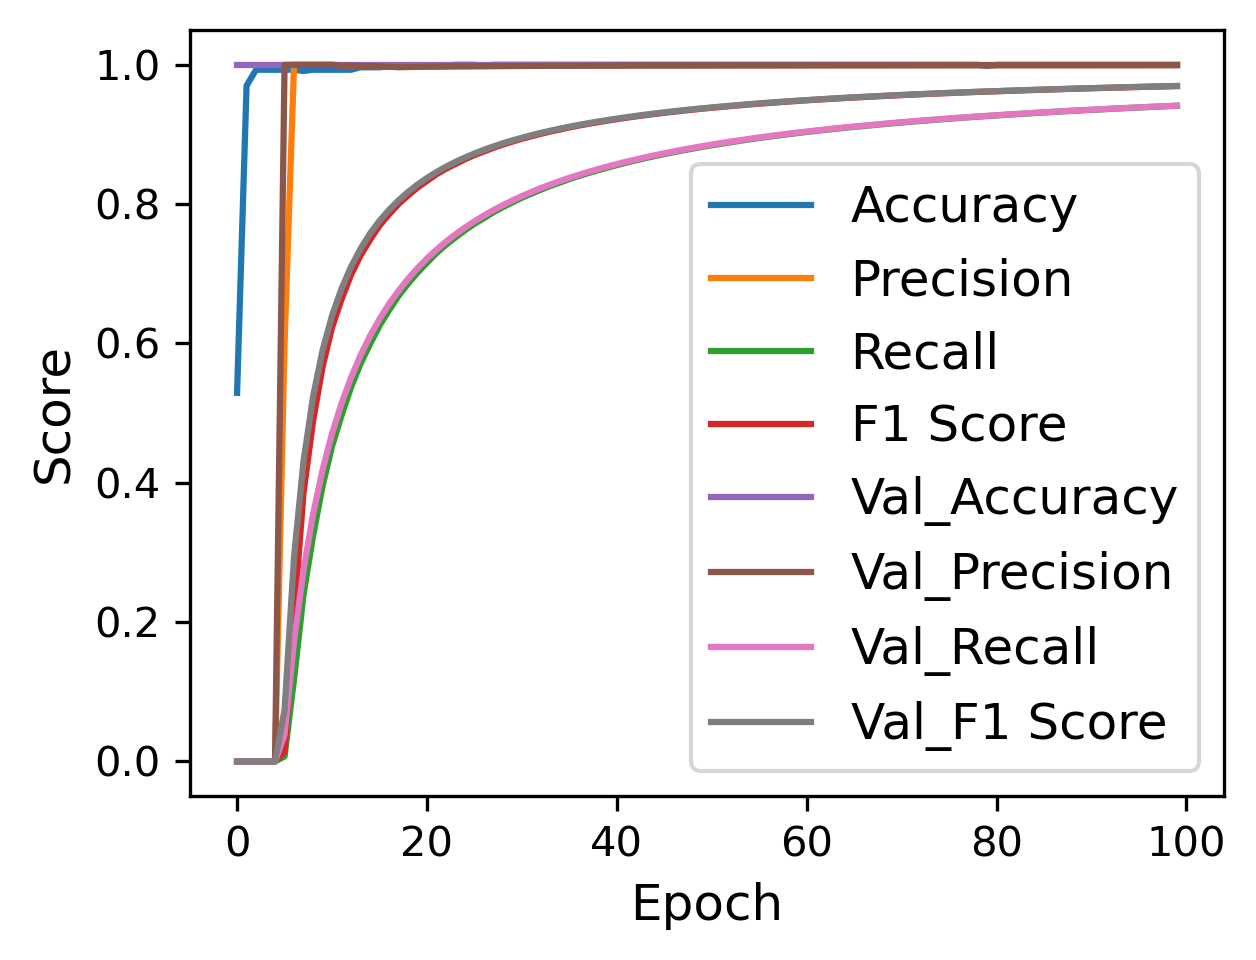

In [140]:
plt.figure(figsize=(4,3),dpi=300)

plt.plot(pred.history['accuracy'])
plt.plot(pred.history['precision'])
plt.plot(pred.history['recall'])
plt.plot(pred.history['f1_score'])

plt.plot(pred.history['val_accuracy'])
plt.plot(pred.history['val_precision'])
plt.plot(pred.history['val_recall'])
plt.plot(pred.history['val_f1_score'])

plt.ylabel('Score',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.legend(['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Val_Accuracy', 'Val_Precision', 'Val_Recall', 'Val_F1 Score'], loc='lower right',fontsize=12)
plt.tight_layout(pad=0) 
# Show graphic
plt.savefig('accLSTM.pdf')
plt.show()

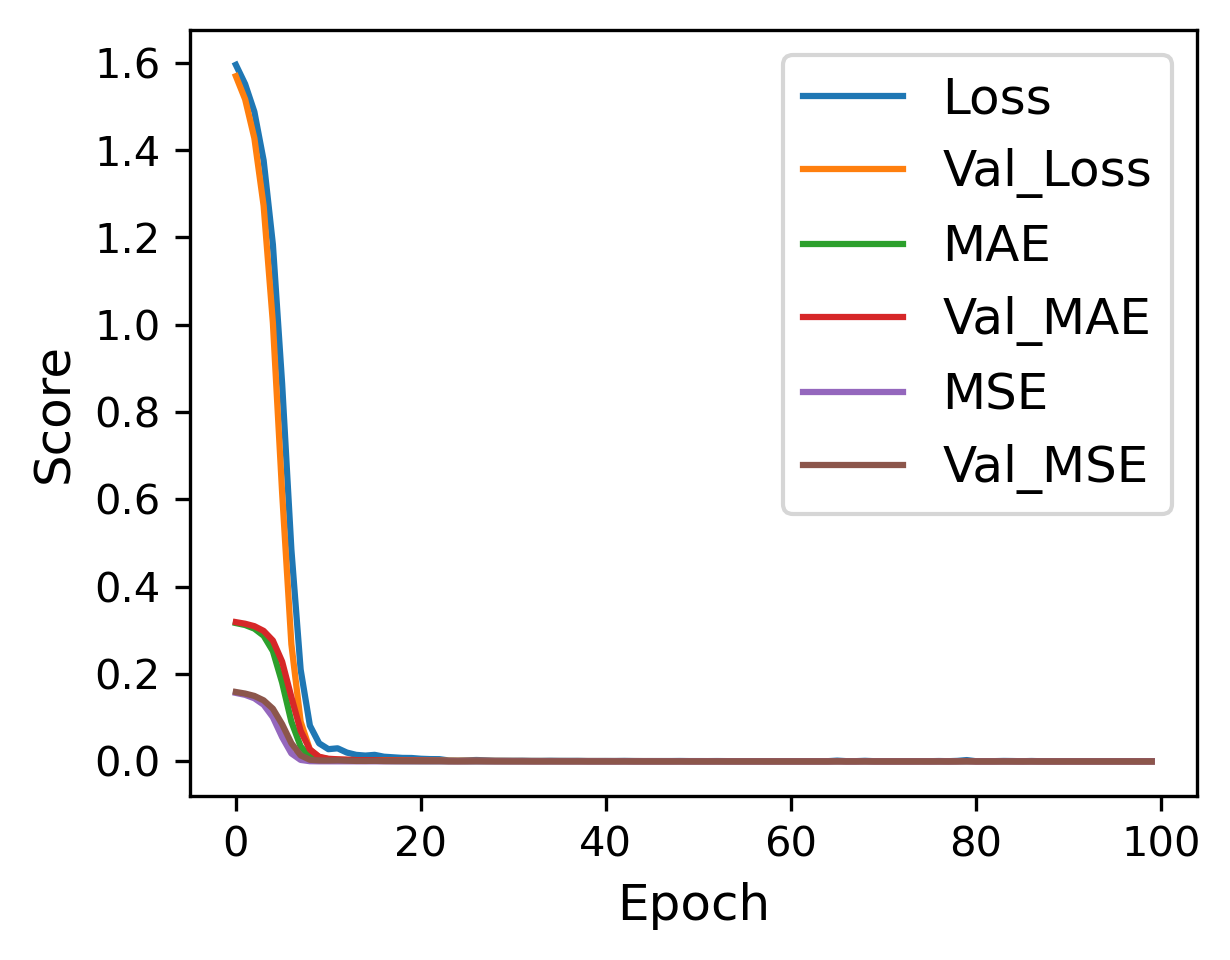

In [139]:
plt.figure(figsize=(4,3),dpi=300)

plt.plot(pred.history['loss'])
plt.plot(pred.history['val_loss'])
plt.plot(pred.history['val_mae'])
plt.plot(pred.history['mae'])
plt.plot(pred.history['val_mse'])
plt.plot(pred.history['mse'])
plt.ylabel('Score',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.legend(['Loss', 'Val_Loss', 'MAE', 'Val_MAE', 'MSE', 'Val_MSE'], loc='upper right',fontsize=12)
plt.tight_layout(pad=0) 
# Show graphic
plt.savefig('LosLSTM.pdf')
plt.show()

In [156]:
yhat_classes = model_conv.predict(X_valid, verbose=0)
rounded_predictions=np.argmax(yhat_classes, axis=1)
rounded_labels=np.argmax(Y_valid, axis=1)
print(classification_report(rounded_labels,rounded_predictions))
print(confusion_matrix(rounded_labels,rounded_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        33
           2       1.00      0.96      0.98        28
           3       0.96      1.00      0.98        22
           4       1.00      1.00      1.00        24

    accuracy                           0.99       126
   macro avg       0.99      0.99      0.99       126
weighted avg       0.99      0.99      0.99       126

[[19  0  0  0  0]
 [ 0 33  0  0  0]
 [ 0  0 27  1  0]
 [ 0  0  0 22  0]
 [ 0  0  0  0 24]]


In [157]:
import time
start_time = time.time()

#Deep Learning Network Structure
model_conv = Sequential()
model_conv.add(Embedding(1000,100, input_length=data.shape[1]))
model_conv.add(Dropout(0.2))
model_conv.add(layers.GRU(64, return_sequences=True))
model_conv.add(layers.SimpleRNN(32))
model_conv.add(Dense(32))
model_conv.add(Activation('relu'))
model_conv.add(Dropout(rate=0.5))
model_conv.add(Dropout(0.2))
model_conv.add(Dense(16))
model_conv.add(Dense(5, activation='softmax'))
model_conv.compile(loss='categorical_crossentropy', optimizer='adam',   metrics=['accuracy','mae','mse',keras_metrics.precision(), keras_metrics.recall(),keras_metrics.f1_score()])
batch_size=16
#Here we train the Network.
pred1=model_conv.fit(X_train, Y_train, batch_size =batch_size, epochs =100, verbose =2,validation_data=(X_valid,Y_valid))
pred1

print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/100


C:\Users\Sohail_Comp\anaconda3\lib\site-packages\keras_metrics\metrics.py:26: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return object.__getattribute__(self, name)


C:\Users\Sohail_Comp\anaconda3\lib\site-packages\keras_metrics\metrics.py:26: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return object.__getattribute__(self, name)


32/32 - 53s - loss: 1.3188 - accuracy: 0.5615 - mae: 0.2849 - mse: 0.1327 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.0000e+00 - val_loss: 0.6937 - val_accuracy: 0.9286 - val_mae: 0.1906 - val_mse: 0.0649 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0000e+00 - 53s/epoch - 2s/step
Epoch 2/100
32/32 - 1s - loss: 0.5261 - accuracy: 0.8869 - mae: 0.1381 - mse: 0.0497 - precision: 0.8953 - recall: 0.1015 - f1_score: 0.1724 - val_loss: 0.0949 - val_accuracy: 0.9921 - val_mae: 0.0324 - val_mse: 0.0042 - val_precision: 0.9715 - val_recall: 0.2795 - val_f1_score: 0.4340 - 712ms/epoch - 22ms/step
Epoch 3/100
32/32 - 1s - loss: 0.2501 - accuracy: 0.9167 - mae: 0.0655 - mse: 0.0228 - precision: 0.9601 - recall: 0.3941 - f1_score: 0.5575 - val_loss: 0.0342 - val_accuracy: 0.9921 - val_mae: 0.0089 - val_mse: 0.0020 - val_precision: 0.9671 - val_recall: 0.4761 - val_f1_score: 0.6381 - 830ms/epoch - 26ms/step
Epoch 4/100
32/32 - 1s - loss: 0.1457 - accuracy: 0.

Epoch 25/100
32/32 - 1s - loss: 0.0485 - accuracy: 0.9782 - mae: 0.0115 - mse: 0.0053 - precision: 0.9776 - recall: 0.9188 - f1_score: 0.9473 - val_loss: 0.0582 - val_accuracy: 0.9921 - val_mae: 0.0032 - val_mse: 0.0031 - val_precision: 0.9774 - val_recall: 0.9204 - val_f1_score: 0.9480 - 500ms/epoch - 16ms/step
Epoch 26/100
32/32 - 1s - loss: 0.0312 - accuracy: 0.9901 - mae: 0.0089 - mse: 0.0032 - precision: 0.9778 - recall: 0.9220 - f1_score: 0.9491 - val_loss: 0.0638 - val_accuracy: 0.9921 - val_mae: 0.0032 - val_mse: 0.0032 - val_precision: 0.9777 - val_recall: 0.9235 - val_f1_score: 0.9498 - 664ms/epoch - 21ms/step
Epoch 27/100
32/32 - 1s - loss: 0.0404 - accuracy: 0.9782 - mae: 0.0110 - mse: 0.0049 - precision: 0.9779 - recall: 0.9247 - f1_score: 0.9506 - val_loss: 0.0484 - val_accuracy: 0.9921 - val_mae: 0.0032 - val_mse: 0.0031 - val_precision: 0.9779 - val_recall: 0.9255 - val_f1_score: 0.9510 - 603ms/epoch - 19ms/step
Epoch 28/100
32/32 - 1s - loss: 0.0339 - accuracy: 0.9802 

Epoch 52/100
32/32 - 1s - loss: 0.0316 - accuracy: 0.9841 - mae: 0.0080 - mse: 0.0039 - precision: 0.9805 - recall: 0.9534 - f1_score: 0.9667 - val_loss: 0.0408 - val_accuracy: 0.9921 - val_mae: 0.0032 - val_mse: 0.0031 - val_precision: 0.9805 - val_recall: 0.9537 - val_f1_score: 0.9669 - 910ms/epoch - 28ms/step
Epoch 53/100
32/32 - 1s - loss: 0.0299 - accuracy: 0.9881 - mae: 0.0077 - mse: 0.0034 - precision: 0.9805 - recall: 0.9540 - f1_score: 0.9671 - val_loss: 0.0481 - val_accuracy: 0.9921 - val_mae: 0.0032 - val_mse: 0.0032 - val_precision: 0.9807 - val_recall: 0.9544 - val_f1_score: 0.9674 - 888ms/epoch - 28ms/step
Epoch 54/100
32/32 - 1s - loss: 0.0267 - accuracy: 0.9881 - mae: 0.0069 - mse: 0.0030 - precision: 0.9808 - recall: 0.9549 - f1_score: 0.9676 - val_loss: 0.0452 - val_accuracy: 0.9921 - val_mae: 0.0032 - val_mse: 0.0031 - val_precision: 0.9810 - val_recall: 0.9551 - val_f1_score: 0.9679 - 576ms/epoch - 18ms/step
Epoch 55/100
32/32 - 1s - loss: 0.0255 - accuracy: 0.9881 

Epoch 78/100
32/32 - 1s - loss: 0.0304 - accuracy: 0.9841 - mae: 0.0075 - mse: 0.0037 - precision: 0.9822 - recall: 0.9664 - f1_score: 0.9742 - val_loss: 0.0049 - val_accuracy: 1.0000 - val_mae: 0.0015 - val_mse: 5.9833e-04 - val_precision: 0.9820 - val_recall: 0.9666 - val_f1_score: 0.9742 - 554ms/epoch - 17ms/step
Epoch 79/100
32/32 - 1s - loss: 0.0352 - accuracy: 0.9841 - mae: 0.0085 - mse: 0.0041 - precision: 0.9821 - recall: 0.9665 - f1_score: 0.9743 - val_loss: 0.0020 - val_accuracy: 1.0000 - val_mae: 7.1982e-04 - val_mse: 1.1678e-04 - val_precision: 0.9822 - val_recall: 0.9666 - val_f1_score: 0.9744 - 653ms/epoch - 20ms/step
Epoch 80/100
32/32 - 1s - loss: 0.0324 - accuracy: 0.9841 - mae: 0.0083 - mse: 0.0040 - precision: 0.9823 - recall: 0.9668 - f1_score: 0.9745 - val_loss: 0.0015 - val_accuracy: 1.0000 - val_mae: 5.3188e-04 - val_mse: 6.7209e-05 - val_precision: 0.9822 - val_recall: 0.9669 - val_f1_score: 0.9745 - 597ms/epoch - 19ms/step
Epoch 81/100
32/32 - 1s - loss: 0.0210

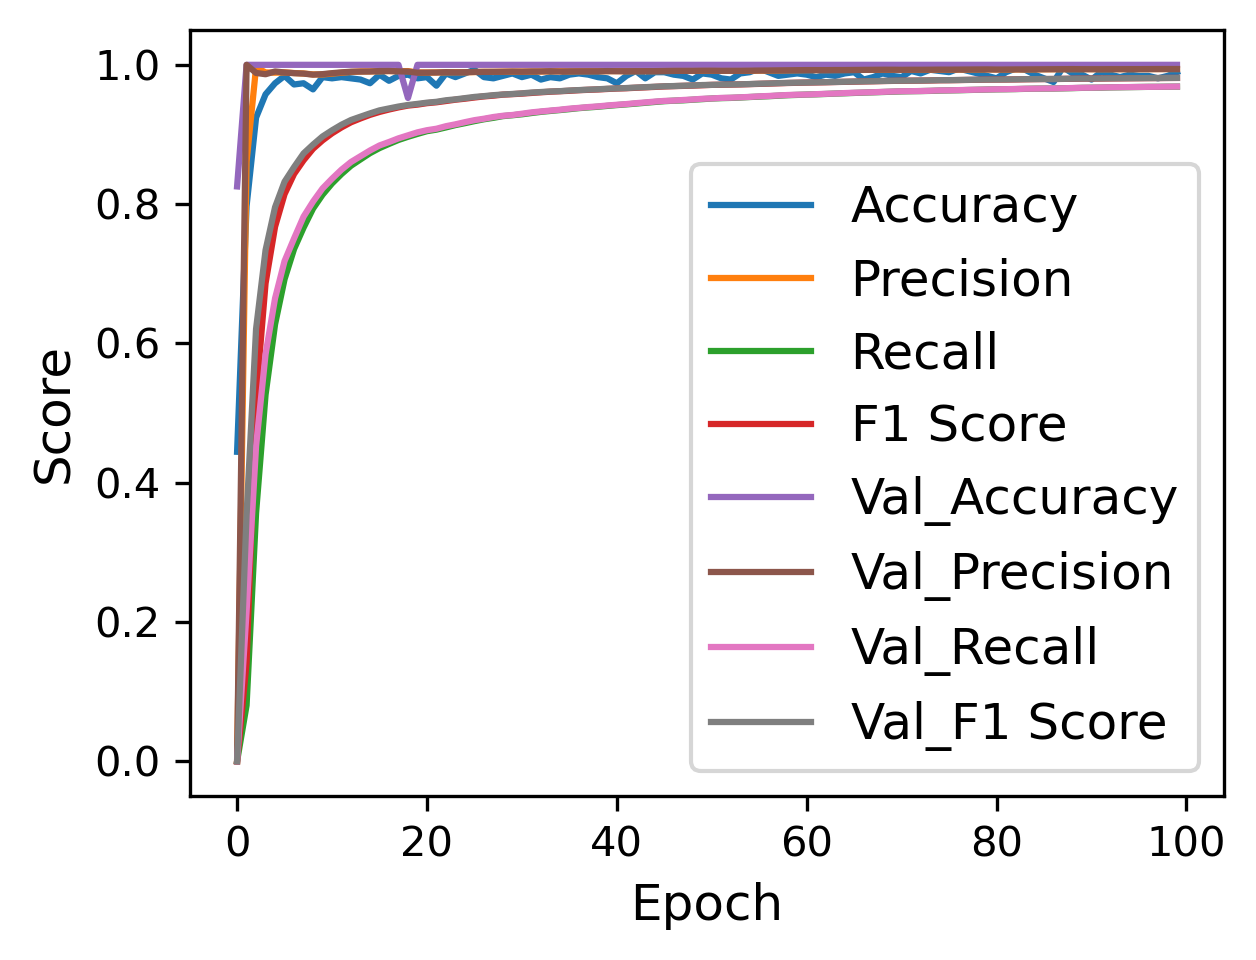

In [141]:
plt.figure(figsize=(4,3),dpi=300)

plt.plot(pred1.history['accuracy'])
plt.plot(pred1.history['precision'])
plt.plot(pred1.history['recall'])
plt.plot(pred1.history['f1_score'])

plt.plot(pred1.history['val_accuracy'])
plt.plot(pred1.history['val_precision'])
plt.plot(pred1.history['val_recall'])
plt.plot(pred1.history['val_f1_score'])

plt.ylabel('Score',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.legend(['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Val_Accuracy', 'Val_Precision', 'Val_Recall', 'Val_F1 Score'], loc='lower right',fontsize=12)
plt.tight_layout(pad=0) 
# Show graphic
plt.savefig('accRNN.pdf')
plt.show()

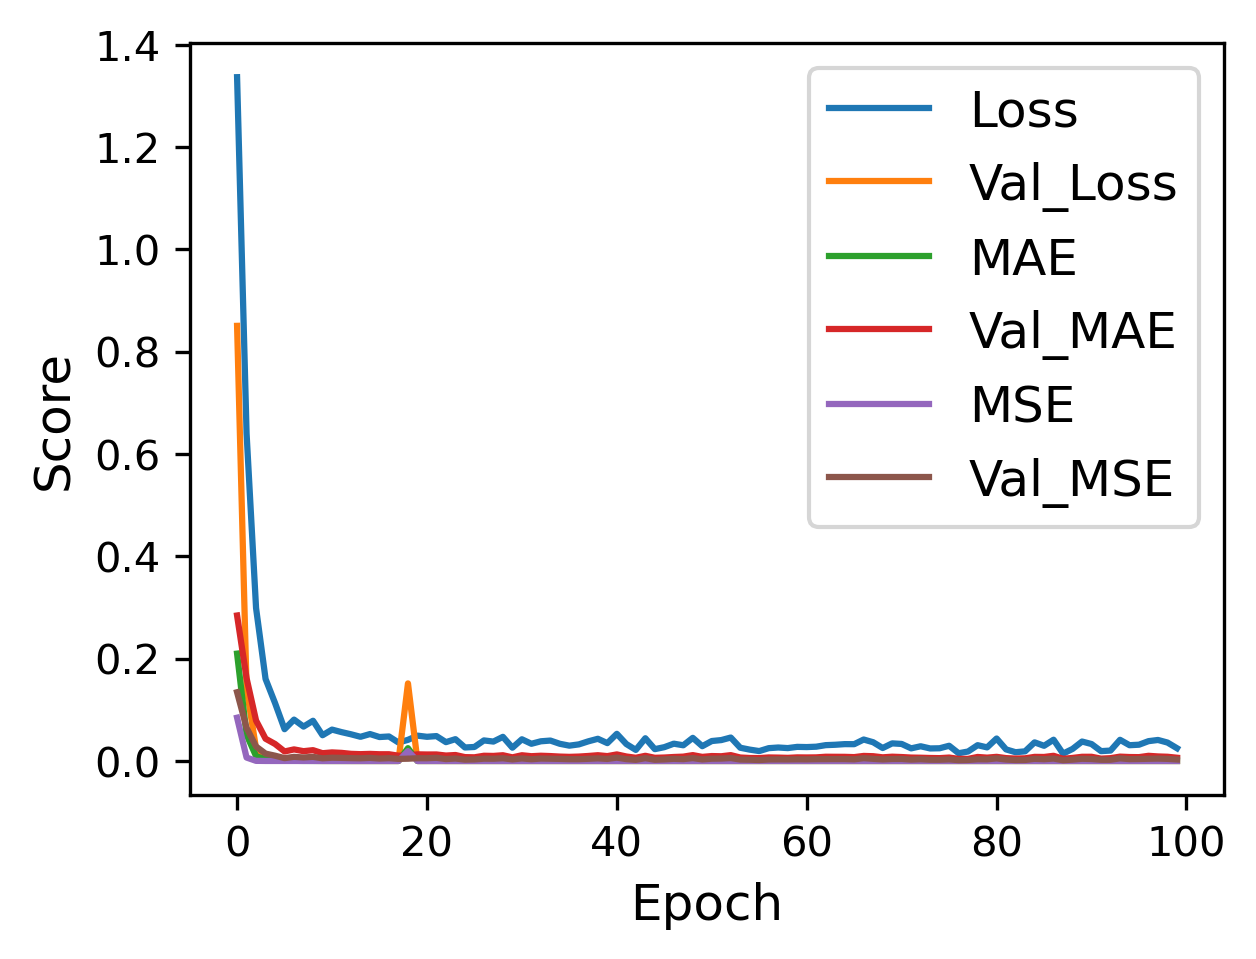

In [142]:
plt.figure(figsize=(4,3),dpi=300)

plt.plot(pred1.history['loss'])
plt.plot(pred1.history['val_loss'])
plt.plot(pred1.history['val_mae'])
plt.plot(pred1.history['mae'])
plt.plot(pred1.history['val_mse'])
plt.plot(pred1.history['mse'])
plt.ylabel('Score',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.legend(['Loss', 'Val_Loss', 'MAE', 'Val_MAE', 'MSE', 'Val_MSE'], loc='upper right',fontsize=12)
plt.tight_layout(pad=0) 
# Show graphic
plt.savefig('LosRNN.pdf')
plt.show()

In [158]:
yhat_classes = model_conv.predict(X_valid, verbose=0)
rounded_predictions=np.argmax(yhat_classes, axis=1)
rounded_labels=np.argmax(Y_valid, axis=1)
print(classification_report(rounded_labels,rounded_predictions))
print(confusion_matrix(rounded_labels,rounded_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.97      1.00      0.99        33
           2       1.00      0.96      0.98        28
           3       1.00      1.00      1.00        22
           4       1.00      1.00      1.00        24

    accuracy                           0.99       126
   macro avg       0.99      0.99      0.99       126
weighted avg       0.99      0.99      0.99       126

[[19  0  0  0  0]
 [ 0 33  0  0  0]
 [ 0  1 27  0  0]
 [ 0  0  0 22  0]
 [ 0  0  0  0 24]]


In [159]:
import time
start_time = time.time()

from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation,Embedding
from keras.models import Sequential
model_conv = Sequential()
model_conv.add(Embedding(5000, 100, input_length=data.shape[1]))
model_conv.add(Conv1D(128, 5, activation='relu'))
model_conv.add(MaxPooling1D(pool_size=4))
model_conv.add(Activation('relu'))
model_conv.add(Dropout(rate=0.5))
model_conv.add(Flatten())
model_conv.add(Dense(32))
model_conv.add(Dense(5, activation='softmax'))
model_conv.compile(loss='categorical_crossentropy', optimizer='adam',   metrics=['accuracy','mae','mse',keras_metrics.precision(), keras_metrics.recall(),keras_metrics.f1_score()])

#Here we train the Network.

pred2=model_conv.fit(X_train, Y_train, batch_size =batch_size, epochs =100, verbose =2,validation_data=(X_valid,Y_valid))
pred2

print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/100


C:\Users\Sohail_Comp\anaconda3\lib\site-packages\keras_metrics\metrics.py:26: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return object.__getattribute__(self, name)


C:\Users\Sohail_Comp\anaconda3\lib\site-packages\keras_metrics\metrics.py:26: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return object.__getattribute__(self, name)


32/32 - 17s - loss: 1.1741 - accuracy: 0.8889 - mae: 0.2685 - mse: 0.1168 - precision: 0.2812 - recall: 0.0247 - f1_score: 0.0439 - val_loss: 0.5612 - val_accuracy: 0.9921 - val_mae: 0.1664 - val_mse: 0.0473 - val_precision: 1.0000 - val_recall: 0.2639 - val_f1_score: 0.4167 - 17s/epoch - 521ms/step
Epoch 2/100
32/32 - 0s - loss: 0.2312 - accuracy: 0.9921 - mae: 0.0725 - mse: 0.0163 - precision: 1.0000 - recall: 0.5171 - f1_score: 0.6780 - val_loss: 0.0441 - val_accuracy: 0.9921 - val_mae: 0.0128 - val_mse: 0.0021 - val_precision: 1.0000 - val_recall: 0.6398 - val_f1_score: 0.7803 - 490ms/epoch - 15ms/step
Epoch 3/100
32/32 - 1s - loss: 0.0401 - accuracy: 0.9940 - mae: 0.0098 - mse: 0.0023 - precision: 0.9981 - recall: 0.7069 - f1_score: 0.8272 - val_loss: 0.0273 - val_accuracy: 0.9921 - val_mae: 0.0052 - val_mse: 0.0022 - val_precision: 0.9965 - val_recall: 0.7597 - val_f1_score: 0.8621 - 725ms/epoch - 23ms/step
Epoch 4/100
32/32 - 1s - loss: 0.0230 - accuracy: 0.9921 - mae: 0.0060 - 

Epoch 25/100
32/32 - 1s - loss: 3.5074e-04 - accuracy: 1.0000 - mae: 1.3968e-04 - mse: 9.4879e-07 - precision: 0.9993 - recall: 0.9708 - f1_score: 0.9848 - val_loss: 0.0333 - val_accuracy: 0.9921 - val_mae: 0.0031 - val_mse: 0.0026 - val_precision: 0.9993 - val_recall: 0.9714 - val_f1_score: 0.9852 - 616ms/epoch - 19ms/step
Epoch 26/100
32/32 - 1s - loss: 2.7147e-04 - accuracy: 1.0000 - mae: 1.0838e-04 - mse: 3.2474e-07 - precision: 0.9994 - recall: 0.9719 - f1_score: 0.9854 - val_loss: 0.0336 - val_accuracy: 0.9921 - val_mae: 0.0031 - val_mse: 0.0026 - val_precision: 0.9994 - val_recall: 0.9725 - val_f1_score: 0.9857 - 891ms/epoch - 28ms/step
Epoch 27/100
32/32 - 1s - loss: 5.1400e-04 - accuracy: 1.0000 - mae: 2.0408e-04 - mse: 2.1900e-06 - precision: 0.9994 - recall: 0.9730 - f1_score: 0.9860 - val_loss: 0.0341 - val_accuracy: 0.9921 - val_mae: 0.0031 - val_mse: 0.0026 - val_precision: 0.9994 - val_recall: 0.9735 - val_f1_score: 0.9863 - 734ms/epoch - 23ms/step
Epoch 28/100
32/32 - 1

Epoch 51/100
32/32 - 1s - loss: 8.0526e-05 - accuracy: 1.0000 - mae: 3.2193e-05 - mse: 3.3589e-08 - precision: 0.9997 - recall: 0.9858 - f1_score: 0.9927 - val_loss: 0.0383 - val_accuracy: 0.9921 - val_mae: 0.0032 - val_mse: 0.0027 - val_precision: 0.9997 - val_recall: 0.9860 - val_f1_score: 0.9928 - 583ms/epoch - 18ms/step
Epoch 52/100
32/32 - 1s - loss: 7.6709e-05 - accuracy: 1.0000 - mae: 3.0659e-05 - mse: 4.0046e-08 - precision: 0.9997 - recall: 0.9861 - f1_score: 0.9928 - val_loss: 0.0382 - val_accuracy: 0.9921 - val_mae: 0.0031 - val_mse: 0.0027 - val_precision: 0.9997 - val_recall: 0.9862 - val_f1_score: 0.9929 - 675ms/epoch - 21ms/step
Epoch 53/100
32/32 - 1s - loss: 5.9923e-05 - accuracy: 1.0000 - mae: 2.3957e-05 - mse: 2.3111e-08 - precision: 0.9997 - recall: 0.9864 - f1_score: 0.9930 - val_loss: 0.0384 - val_accuracy: 0.9921 - val_mae: 0.0032 - val_mse: 0.0027 - val_precision: 0.9997 - val_recall: 0.9865 - val_f1_score: 0.9931 - 588ms/epoch - 18ms/step
Epoch 54/100
32/32 - 1

Epoch 77/100
32/32 - 1s - loss: 4.6652e-05 - accuracy: 1.0000 - mae: 1.8647e-05 - mse: 2.4314e-08 - precision: 0.9998 - recall: 0.9907 - f1_score: 0.9952 - val_loss: 0.0409 - val_accuracy: 0.9921 - val_mae: 0.0032 - val_mse: 0.0029 - val_precision: 0.9998 - val_recall: 0.9907 - val_f1_score: 0.9952 - 882ms/epoch - 28ms/step
Epoch 78/100
32/32 - 1s - loss: 6.8707e-05 - accuracy: 1.0000 - mae: 2.7301e-05 - mse: 3.2580e-07 - precision: 0.9998 - recall: 0.9908 - f1_score: 0.9953 - val_loss: 0.0411 - val_accuracy: 0.9921 - val_mae: 0.0032 - val_mse: 0.0029 - val_precision: 0.9998 - val_recall: 0.9908 - val_f1_score: 0.9953 - 1s/epoch - 32ms/step
Epoch 79/100
32/32 - 1s - loss: 4.3560e-05 - accuracy: 1.0000 - mae: 1.7374e-05 - mse: 1.0237e-07 - precision: 0.9998 - recall: 0.9909 - f1_score: 0.9953 - val_loss: 0.0408 - val_accuracy: 0.9921 - val_mae: 0.0032 - val_mse: 0.0028 - val_precision: 0.9998 - val_recall: 0.9910 - val_f1_score: 0.9954 - 657ms/epoch - 21ms/step
Epoch 80/100
32/32 - 1s -

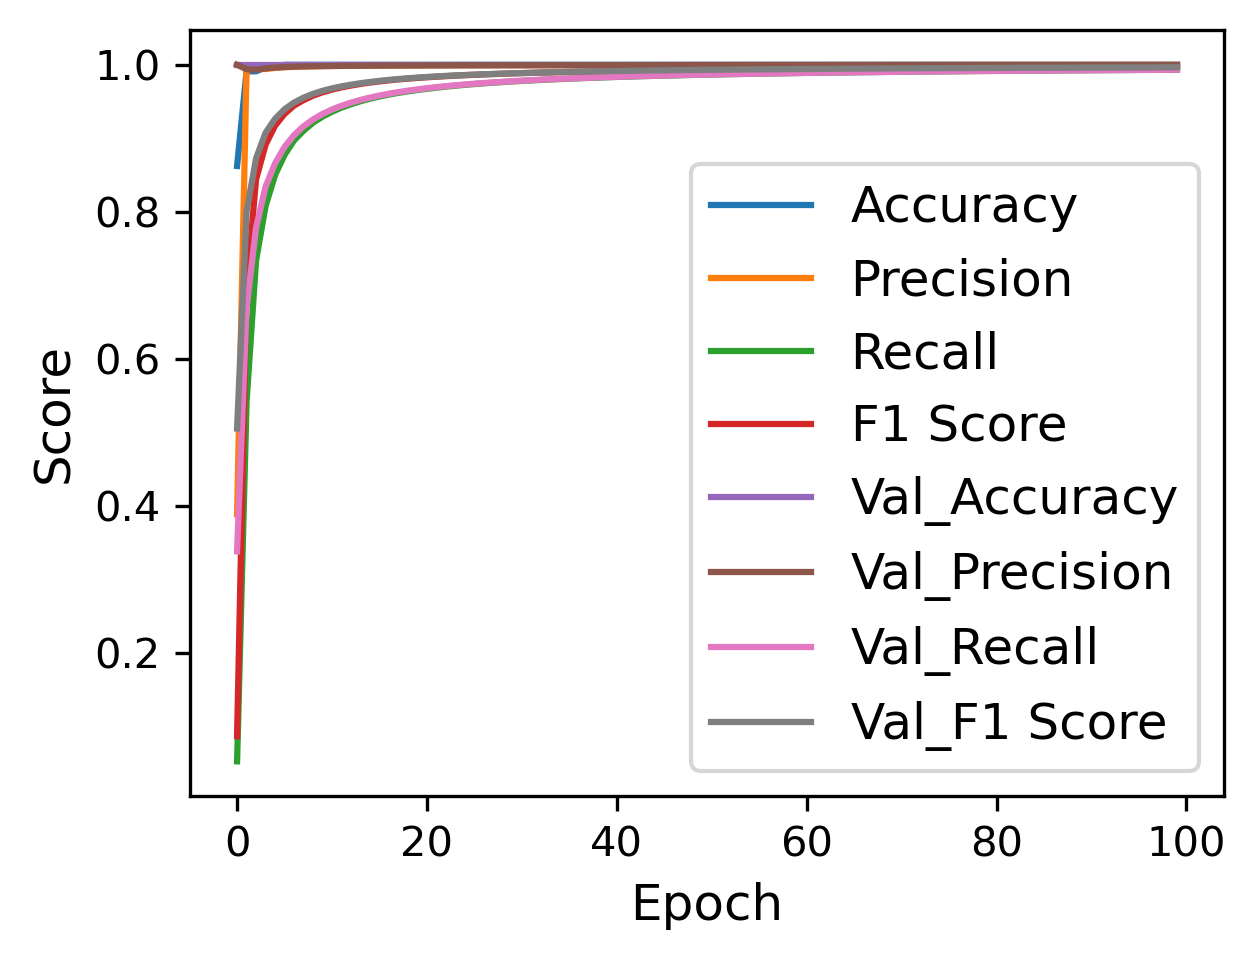

In [145]:
plt.figure(figsize=(4,3),dpi=300)

plt.plot(pred2.history['accuracy'])
plt.plot(pred2.history['precision'])
plt.plot(pred2.history['recall'])
plt.plot(pred2.history['f1_score'])

plt.plot(pred2.history['val_accuracy'])
plt.plot(pred2.history['val_precision'])
plt.plot(pred2.history['val_recall'])
plt.plot(pred2.history['val_f1_score'])

plt.ylabel('Score',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.legend(['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Val_Accuracy', 'Val_Precision', 'Val_Recall', 'Val_F1 Score'], loc='lower right',fontsize=12)
plt.tight_layout(pad=0) 
# Show graphic
plt.savefig('accCNN.pdf')
plt.show()

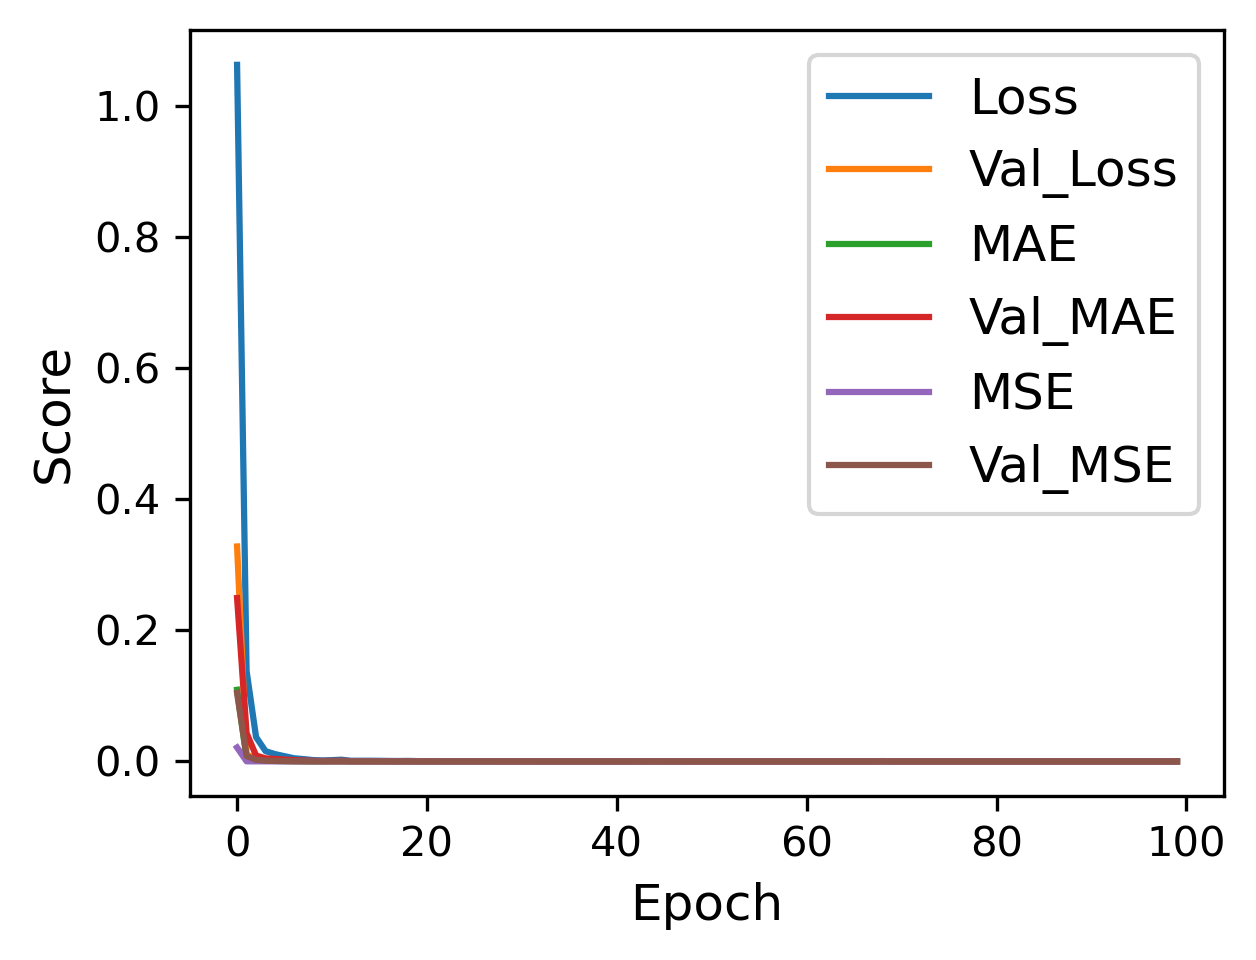

In [144]:
plt.figure(figsize=(4,3),dpi=300)

plt.plot(pred2.history['loss'])
plt.plot(pred2.history['val_loss'])
plt.plot(pred2.history['val_mae'])
plt.plot(pred2.history['mae'])
plt.plot(pred2.history['val_mse'])
plt.plot(pred2.history['mse'])
plt.ylabel('Score',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.legend(['Loss', 'Val_Loss', 'MAE', 'Val_MAE', 'MSE', 'Val_MSE'], loc='upper right',fontsize=12)
plt.tight_layout(pad=0) 
# Show graphic
plt.savefig('LosCNN.pdf')
plt.show()

In [160]:
yhat_classes = model_conv.predict(X_valid, verbose=0)
rounded_predictions=np.argmax(yhat_classes, axis=1)
rounded_labels=np.argmax(Y_valid, axis=1)
print(classification_report(rounded_labels,rounded_predictions))
print(confusion_matrix(rounded_labels,rounded_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.97      1.00      0.99        33
           2       1.00      0.96      0.98        28
           3       1.00      1.00      1.00        22
           4       1.00      1.00      1.00        24

    accuracy                           0.99       126
   macro avg       0.99      0.99      0.99       126
weighted avg       0.99      0.99      0.99       126

[[19  0  0  0  0]
 [ 0 33  0  0  0]
 [ 0  1 27  0  0]
 [ 0  0  0 22  0]
 [ 0  0  0  0 24]]


In [161]:
import time
start_time = time.time()

from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation,Embedding
from keras.models import Sequential
model_conv = Sequential()
model_conv.add(Embedding(1000, 200, input_length=data.shape[1]))
model_conv.add(Conv1D(128, 2, activation='relu'))
model_conv.add(MaxPooling1D(pool_size=2))
model_conv.add(LSTM(100))
model_conv.add(Dense(5, activation='softmax'))
model_conv.compile(loss='categorical_crossentropy', optimizer='adam',   metrics=['accuracy','mae','mse',keras_metrics.precision(), keras_metrics.recall(),keras_metrics.f1_score()])



#Here we train the Network.
pred3=model_conv.fit(X_train, Y_train, batch_size =batch_size, epochs =100, verbose =2,validation_data=(X_valid,Y_valid))
pred3

print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/100


C:\Users\Sohail_Comp\anaconda3\lib\site-packages\keras_metrics\metrics.py:26: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return object.__getattribute__(self, name)


C:\Users\Sohail_Comp\anaconda3\lib\site-packages\keras_metrics\metrics.py:26: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return object.__getattribute__(self, name)


32/32 - 42s - loss: 1.3289 - accuracy: 0.5496 - mae: 0.2862 - mse: 0.1328 - precision: 0.1875 - recall: 0.0170 - f1_score: 0.0307 - val_loss: 0.6007 - val_accuracy: 0.9921 - val_mae: 0.1654 - val_mse: 0.0551 - val_precision: 1.0000 - val_recall: 0.2216 - val_f1_score: 0.3617 - 42s/epoch - 1s/step
Epoch 2/100
32/32 - 1s - loss: 0.1235 - accuracy: 0.9921 - mae: 0.0353 - mse: 0.0098 - precision: 0.9904 - recall: 0.4830 - f1_score: 0.6435 - val_loss: 0.0110 - val_accuracy: 0.9921 - val_mae: 0.0028 - val_mse: 0.0011 - val_precision: 0.9934 - val_recall: 0.6193 - val_f1_score: 0.7629 - 553ms/epoch - 17ms/step
Epoch 3/100
32/32 - 1s - loss: 0.0097 - accuracy: 0.9960 - mae: 0.0018 - mse: 9.2287e-04 - precision: 0.9953 - recall: 0.6969 - f1_score: 0.8194 - val_loss: 0.0233 - val_accuracy: 0.9921 - val_mae: 0.0033 - val_mse: 0.0020 - val_precision: 0.9964 - val_recall: 0.7489 - val_f1_score: 0.8551 - 570ms/epoch - 18ms/step
Epoch 4/100
32/32 - 1s - loss: 0.0023 - accuracy: 1.0000 - mae: 8.3132e-

Epoch 24/100
32/32 - 1s - loss: 6.2164e-05 - accuracy: 1.0000 - mae: 2.4865e-05 - mse: 3.6205e-09 - precision: 0.9997 - recall: 0.9685 - f1_score: 0.9838 - val_loss: 0.0227 - val_accuracy: 0.9921 - val_mae: 0.0030 - val_mse: 0.0020 - val_precision: 0.9997 - val_recall: 0.9692 - val_f1_score: 0.9842 - 772ms/epoch - 24ms/step
Epoch 25/100
32/32 - 1s - loss: 5.8437e-05 - accuracy: 1.0000 - mae: 2.3375e-05 - mse: 3.1987e-09 - precision: 0.9997 - recall: 0.9698 - f1_score: 0.9845 - val_loss: 0.0229 - val_accuracy: 0.9921 - val_mae: 0.0030 - val_mse: 0.0020 - val_precision: 0.9997 - val_recall: 0.9704 - val_f1_score: 0.9848 - 958ms/epoch - 30ms/step
Epoch 26/100
32/32 - 1s - loss: 5.4991e-05 - accuracy: 1.0000 - mae: 2.1997e-05 - mse: 2.7960e-09 - precision: 0.9997 - recall: 0.9710 - f1_score: 0.9851 - val_loss: 0.0230 - val_accuracy: 0.9921 - val_mae: 0.0030 - val_mse: 0.0021 - val_precision: 0.9997 - val_recall: 0.9715 - val_f1_score: 0.9854 - 828ms/epoch - 26ms/step
Epoch 27/100
32/32 - 1

Epoch 50/100
32/32 - 1s - loss: 1.9224e-05 - accuracy: 1.0000 - mae: 7.6891e-06 - mse: 2.9358e-10 - precision: 0.9998 - recall: 0.9851 - f1_score: 0.9924 - val_loss: 0.0254 - val_accuracy: 0.9921 - val_mae: 0.0031 - val_mse: 0.0022 - val_precision: 0.9998 - val_recall: 0.9852 - val_f1_score: 0.9925 - 707ms/epoch - 22ms/step
Epoch 51/100
32/32 - 1s - loss: 1.8587e-05 - accuracy: 1.0000 - mae: 7.4344e-06 - mse: 2.7151e-10 - precision: 0.9998 - recall: 0.9854 - f1_score: 0.9926 - val_loss: 0.0255 - val_accuracy: 0.9921 - val_mae: 0.0031 - val_mse: 0.0022 - val_precision: 0.9998 - val_recall: 0.9855 - val_f1_score: 0.9926 - 574ms/epoch - 18ms/step
Epoch 52/100
32/32 - 1s - loss: 1.7986e-05 - accuracy: 1.0000 - mae: 7.1935e-06 - mse: 2.5184e-10 - precision: 0.9998 - recall: 0.9856 - f1_score: 0.9927 - val_loss: 0.0256 - val_accuracy: 0.9921 - val_mae: 0.0031 - val_mse: 0.0022 - val_precision: 0.9998 - val_recall: 0.9858 - val_f1_score: 0.9928 - 745ms/epoch - 23ms/step
Epoch 53/100
32/32 - 1

Epoch 76/100
32/32 - 1s - loss: 9.1116e-06 - accuracy: 1.0000 - mae: 3.6456e-06 - mse: 5.8588e-11 - precision: 0.9999 - recall: 0.9902 - f1_score: 0.9950 - val_loss: 0.0276 - val_accuracy: 0.9921 - val_mae: 0.0031 - val_mse: 0.0024 - val_precision: 0.9999 - val_recall: 0.9903 - val_f1_score: 0.9951 - 671ms/epoch - 21ms/step
Epoch 77/100
32/32 - 1s - loss: 8.8976e-06 - accuracy: 1.0000 - mae: 3.5591e-06 - mse: 5.5966e-11 - precision: 0.9999 - recall: 0.9903 - f1_score: 0.9951 - val_loss: 0.0276 - val_accuracy: 0.9921 - val_mae: 0.0031 - val_mse: 0.0024 - val_precision: 0.9999 - val_recall: 0.9904 - val_f1_score: 0.9951 - 775ms/epoch - 24ms/step
Epoch 78/100
32/32 - 1s - loss: 8.6811e-06 - accuracy: 1.0000 - mae: 3.4723e-06 - mse: 5.2714e-11 - precision: 0.9999 - recall: 0.9905 - f1_score: 0.9952 - val_loss: 0.0277 - val_accuracy: 0.9921 - val_mae: 0.0031 - val_mse: 0.0024 - val_precision: 0.9999 - val_recall: 0.9905 - val_f1_score: 0.9952 - 995ms/epoch - 31ms/step
Epoch 79/100
32/32 - 1

In [162]:
yhat_classes = model_conv.predict(X_valid, verbose=0)
rounded_predictions=np.argmax(yhat_classes, axis=1)
rounded_labels=np.argmax(Y_valid, axis=1)
print(classification_report(rounded_labels,rounded_predictions))
print(confusion_matrix(rounded_labels,rounded_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        33
           2       1.00      0.96      0.98        28
           3       0.96      1.00      0.98        22
           4       1.00      1.00      1.00        24

    accuracy                           0.99       126
   macro avg       0.99      0.99      0.99       126
weighted avg       0.99      0.99      0.99       126

[[19  0  0  0  0]
 [ 0 33  0  0  0]
 [ 0  0 27  1  0]
 [ 0  0  0 22  0]
 [ 0  0  0  0 24]]


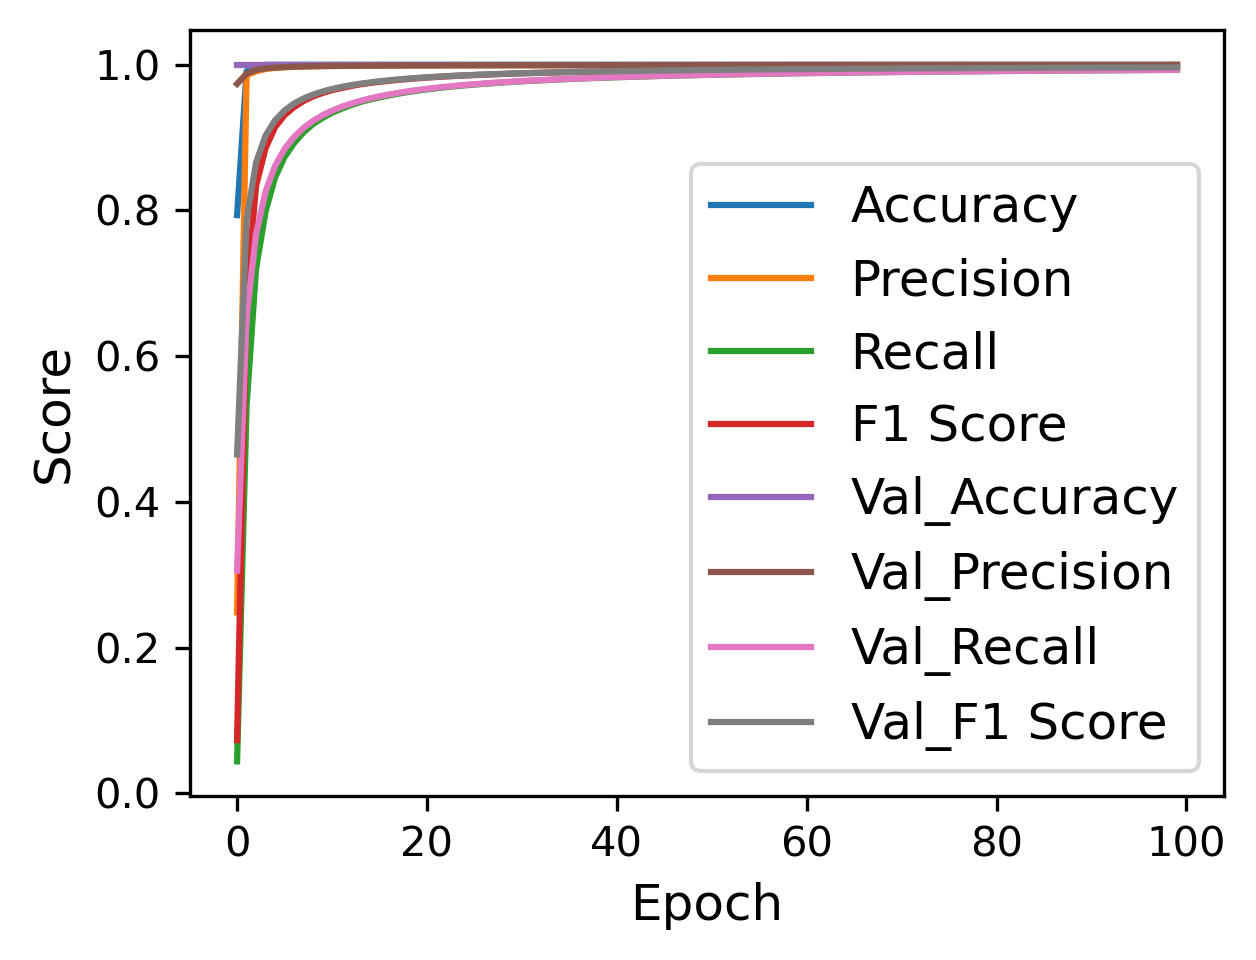

In [146]:
plt.figure(figsize=(4,3),dpi=300)

plt.plot(pred3.history['accuracy'])
plt.plot(pred3.history['precision'])
plt.plot(pred3.history['recall'])
plt.plot(pred3.history['f1_score'])

plt.plot(pred3.history['val_accuracy'])
plt.plot(pred3.history['val_precision'])
plt.plot(pred3.history['val_recall'])
plt.plot(pred3.history['val_f1_score'])

plt.ylabel('Score',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.legend(['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Val_Accuracy', 'Val_Precision', 'Val_Recall', 'Val_F1 Score'], loc='lower right',fontsize=12)
plt.tight_layout(pad=0) 
# Show graphic
plt.savefig('accCNNLSTM.pdf')
plt.show()

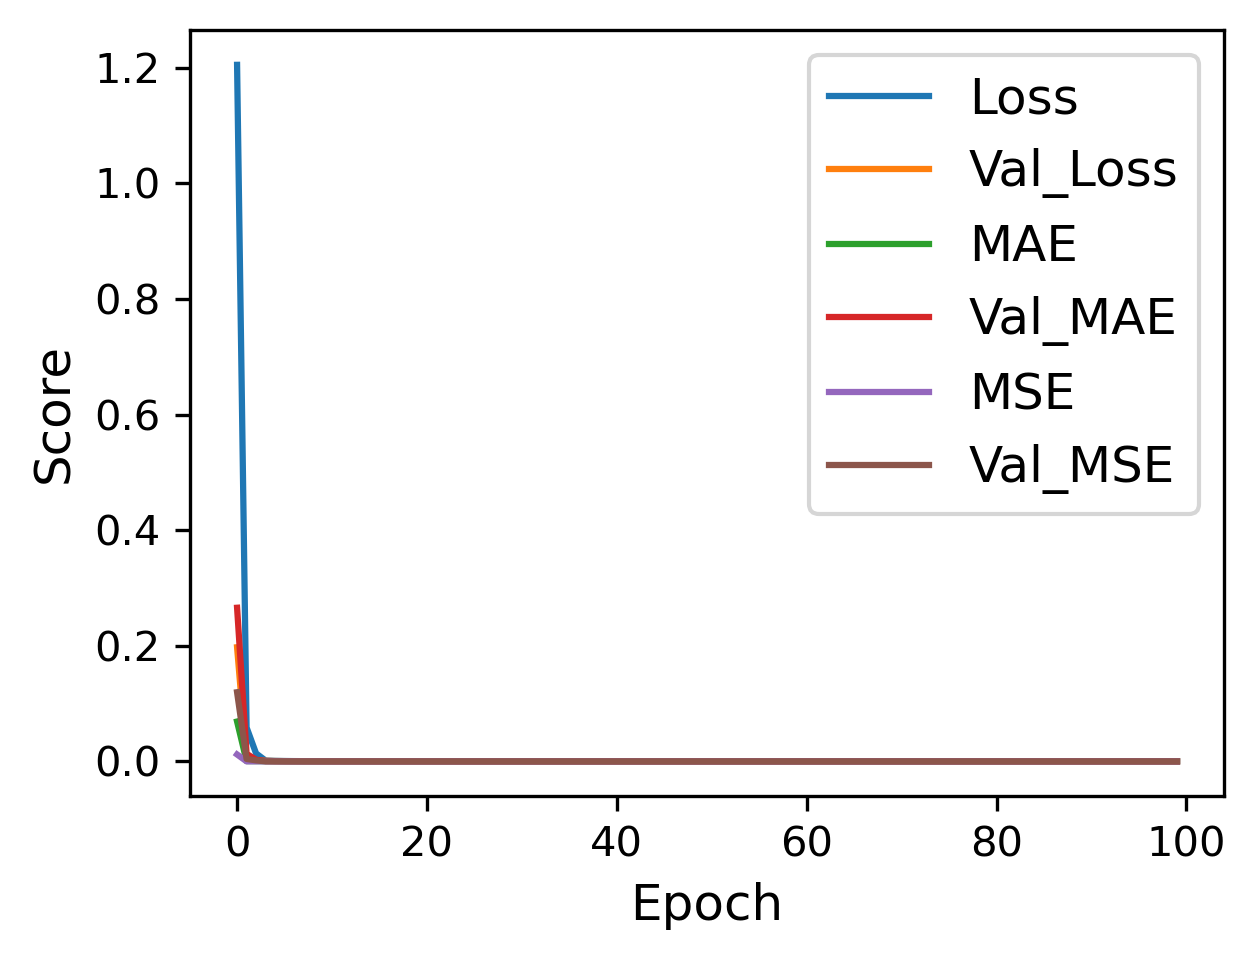

In [147]:
plt.figure(figsize=(4,3),dpi=300)

plt.plot(pred3.history['loss'])
plt.plot(pred3.history['val_loss'])
plt.plot(pred3.history['val_mae'])
plt.plot(pred3.history['mae'])
plt.plot(pred3.history['val_mse'])
plt.plot(pred3.history['mse'])
plt.ylabel('Score',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.legend(['Loss', 'Val_Loss', 'MAE', 'Val_MAE', 'MSE', 'Val_MSE'], loc='upper right',fontsize=12)
plt.tight_layout(pad=0) 
# Show graphic
plt.savefig('LosCNNLSTM.pdf')
plt.show()

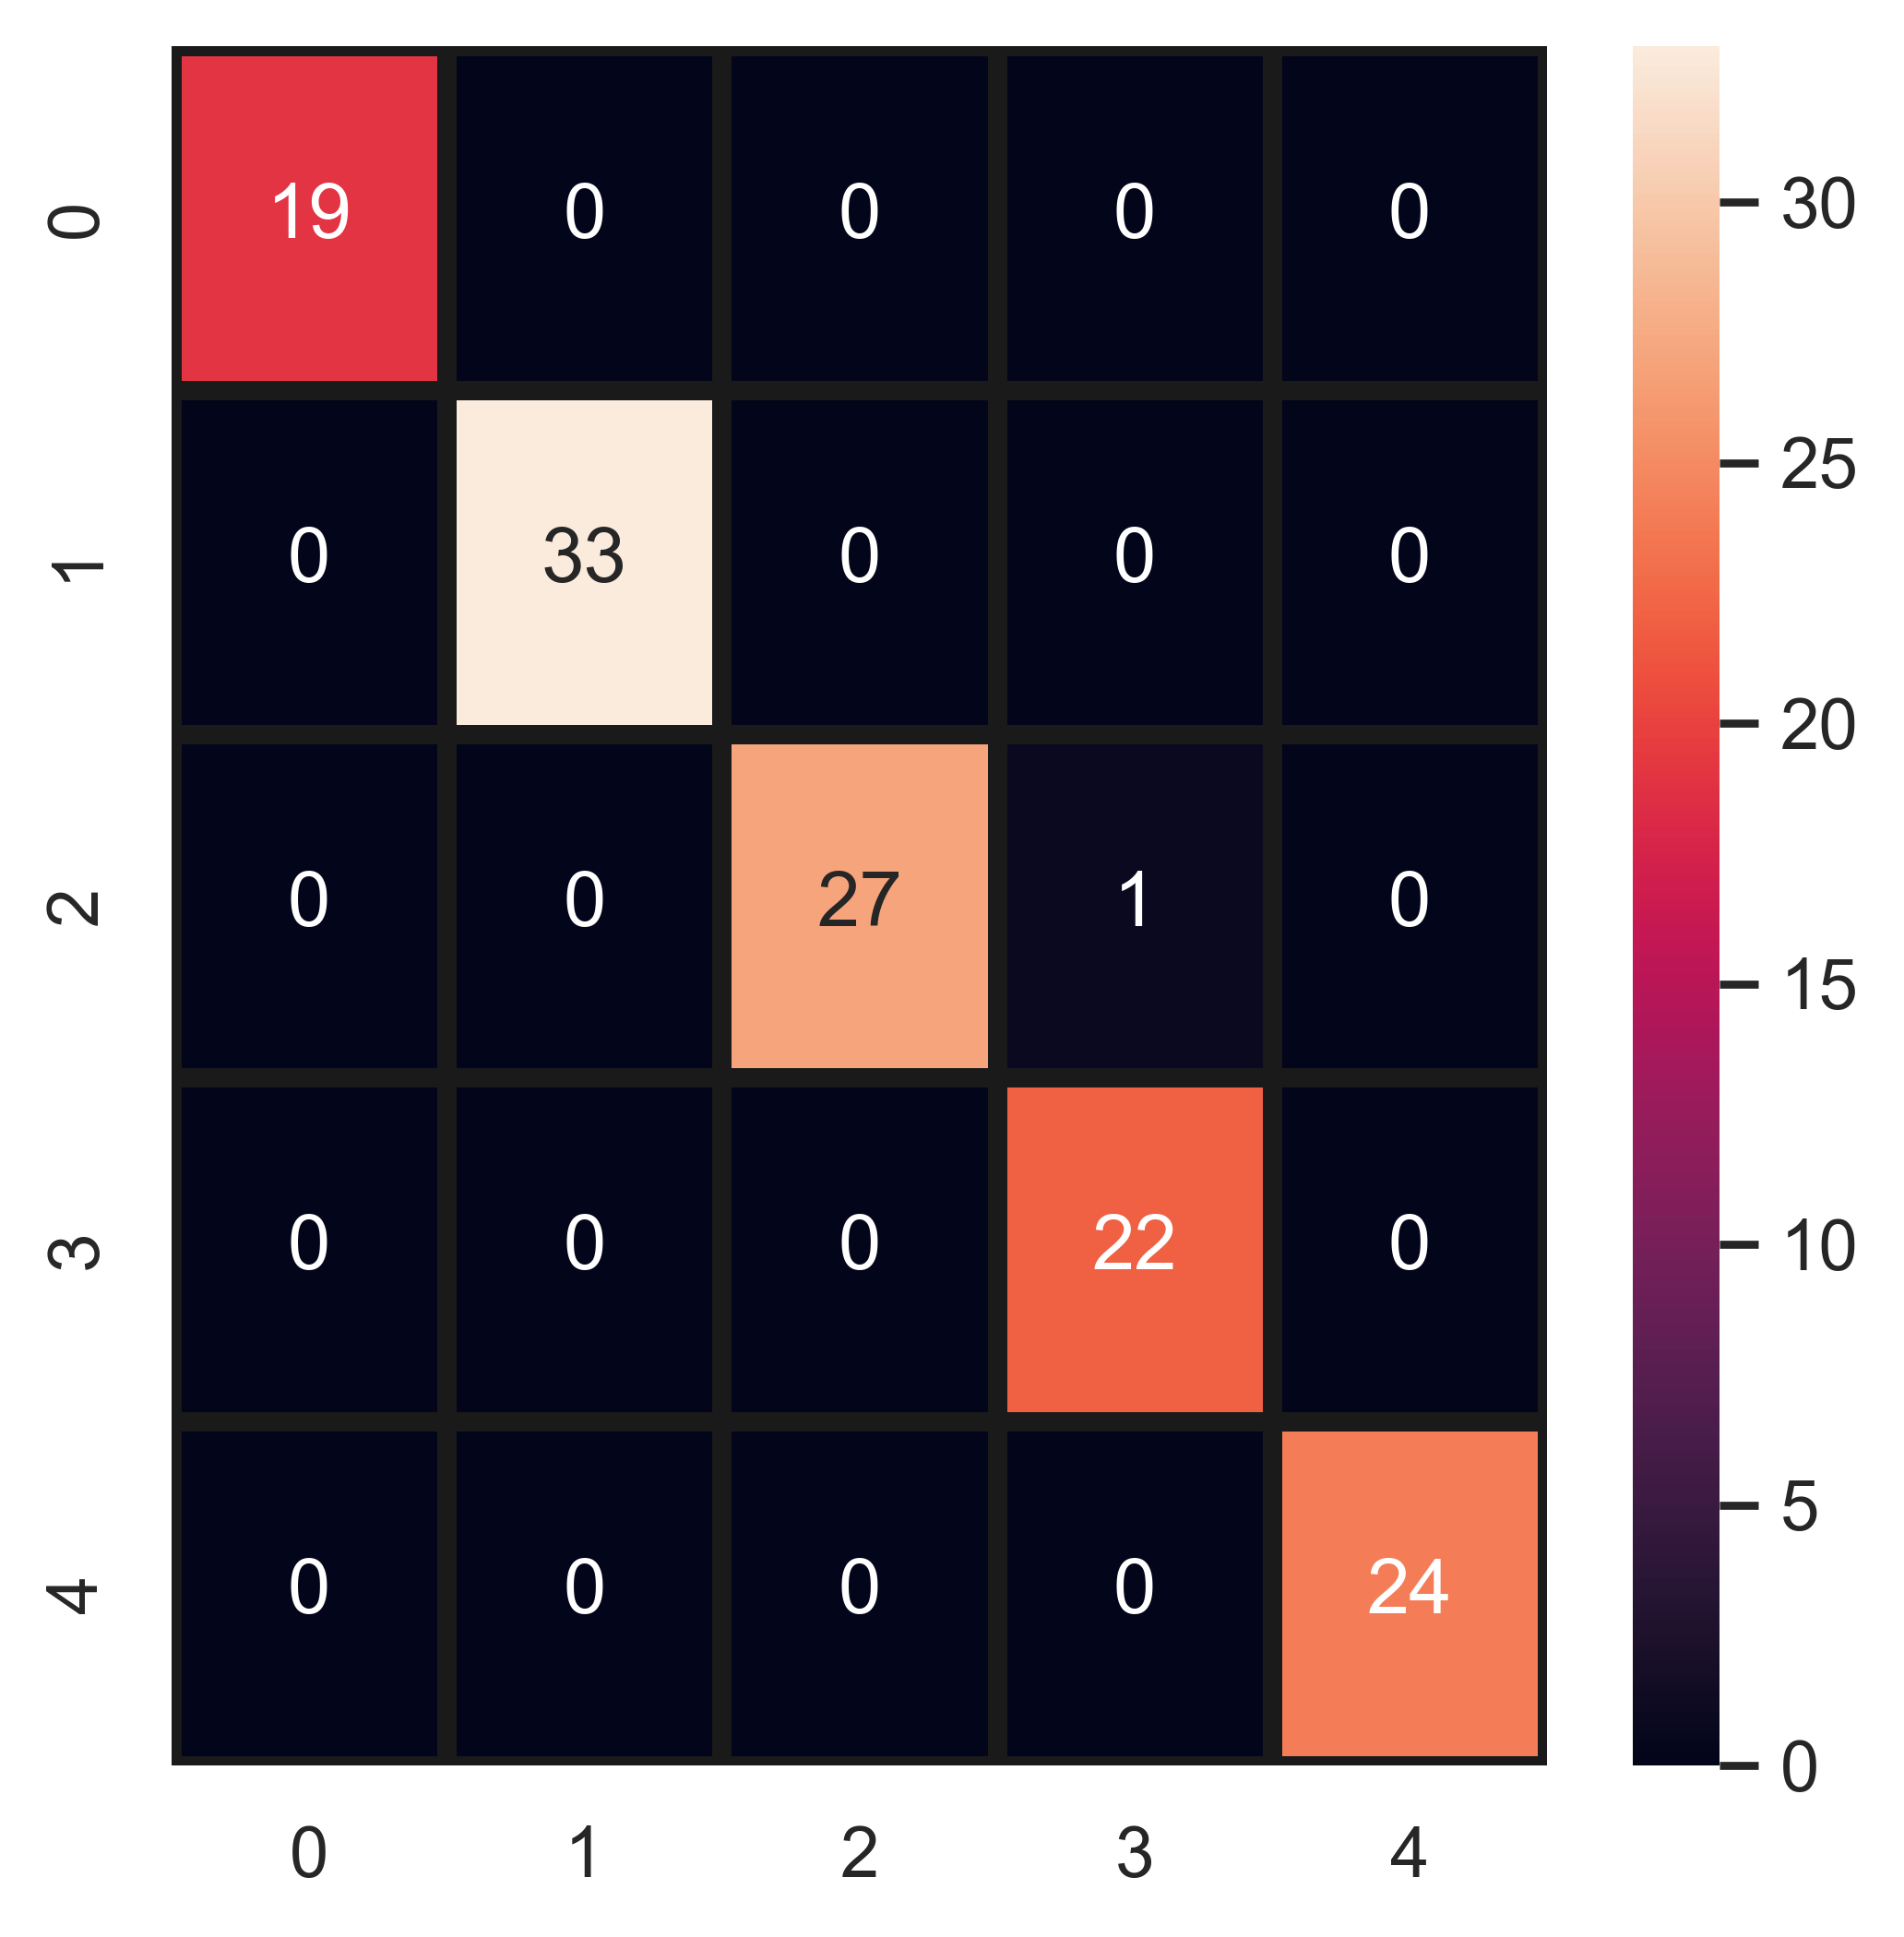

In [170]:

array4=[[19 , 0 , 0,  0  ,0],
 [ 0, 33 , 0 , 0 , 0],
 [ 0 , 0, 27 , 1 , 0],
 [ 0,  0,  0 ,22 , 0],
 [ 0,  0 , 0 , 0 ,24]]
RF = pd.DataFrame(array4, index = [i for i in "01234"],
                  columns = [i for i in "01234"])

i=1
def plot_sub_sentiment(Airline):
    sns.set()
    #tmp = rfc.fit(X_train, y_train.ravel())
    sns.heatmap(Airline,annot=True,fmt = "d",linecolor="k",linewidths=3)
    plt.title("",fontsize=10)

plt.figure(1,figsize=(4, 4),dpi=500)
plt.subplot(111) 
plot_sub_sentiment(RF)


plt.tight_layout(pad=0) 
# Show graphic
plt.savefig('ConLSTM.pdf')
plt.show()


In [21]:
# t-test
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import t

# function for calculating the t-test for two dependent samples
def dependent_ttest(data1, data2, alpha):
	# calculate means
	mean1, mean2 = mean(data1), mean(data2)
	# number of paired samples
	n = len(data1)
	# sum squared difference between observations
	d1 = sum([(data1[i]-data2[i])**2 for i in range(n)])
	# sum difference between observations
	d2 = sum([data1[i]-data2[i] for i in range(n)])
	# standard deviation of the difference between means
	sd = sqrt((d1 - (d2**2 / n)) / (n - 1))
	# standard error of the difference between the means
	sed = sd / sqrt(n)
	# calculate the t statistic
	t_stat = (mean1 - mean2) / sed
	# degrees of freedom
	df = n - 1
	# calculate the critical value
	cv = t.ppf(1.0 - alpha, df)
	# calculate the p-value
	p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
	# return everything
	return t_stat, df, cv, p

# seed the random number generator
seed(1)


hb = [1.00 ,1.00, 1.00, 1.00]
rf = [0.99, 0.99, 0.99, 0.99]
GBM = [0.99, 0.99, 0.99, 0.99]
ADA = [0.83, 0.74, 0.83, 0.77]
LR = [0.96 ,0.96, 0.96 ,0.96]




# calculate the t test
alpha =0.5
t_stat, df, cv, p = dependent_ttest(hb, rf, alpha)
print('t=%.3f, df=%d' % (t_stat, df))
print(cv)
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are not equal.')


t=inf, df=3
7.203760432571475e-17
Reject the null hypothesis that the means are not equal.


C:\Users\SOHAIL~1\AppData\Local\Temp/ipykernel_3960/2583718234.py:23: RuntimeWarning: divide by zero encountered in double_scalars
  t_stat = (mean1 - mean2) / sed
